Consumer loans are the most typical retail product where credit risk modeling is applied.

PD (Probability of default): Logistic regression

LGD (Loss given default): Beta regression

EAD (Exposure at default): Beta regression

PD needs a flag of whether borrower defaulted or not (loan_status column helps).

LGD: How much of the loan was recovered after borrower had defaulted (recoveries column helps)

EAD: Total exposure the moment the borrower defaulted compared to total exosure in the past (total_rec_prncp column helps)

Grade is that of the external agency given as letters from A to G.

DTI is debt-to-income ratio

PD model: All independent features need to be categorical. Grouping multiple categories into one to reduce the number of categories. We need to make continuous variables (Annual income, number of credit inquiries in the last 6 months) discrete using dummy variables.

`Fine classing:` Dividing the data into finite intervals (Ex: number of months since the loan has been granted can be grouped as less than 1, 1 to 3, 4 to 6...). The grouping of the variables will be based on if the adjacent category discriminates between deafulted and non=defaulted borrowers. If they don't discriminate, they are merged into one.

`Coarse classing:` After grouping based on discrimination between defaulted and non-defaulted, categories are obatained. There is no need for intervals to be equal.

# Data Preparation

# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Import Data

In [19]:
loan_data_backup = pd.read_csv(r'C:\Users\Lenovo\Documents\Study\Data\LCdata_2007_2011\loan.csv')

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


It's always a good practice to store a copy of our data before making any changes

In [20]:
loan_data = loan_data_backup.copy()

# Explore Data

In [21]:
loan_data

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83     C        C4   
2       36 months   15.96%        84.33     C        C5   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
...           ...      ...          ...   ...       ...   
39712   36 months    8.07%        78.42     A        A4   
39713   36 months   10.28%       275.38     C        C1   
39714   36 months    8.07%       156.84     A        A4   
39715   36 months    7.43%       155.38     A        A2   
39716   36 months   13.75%       255.43     E        E2   

                        emp_title emp_length home_ownership  annual_inc  \
0                             NaN  10+ years           RENT     24000.0   
1                           Ryder   < 1 year           RENT     30000.0   
2                             NaN  10+ years           RENT     12252.0   
3             AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4        University Medical Group     1 year           RENT     80000.0   
...                           ...        ...            ...         ...   
39712             FiSite Research    4 years       MORTGAGE    110000.0   
39713  Squarewave Solutions, Ltd.    3 years           RENT     18000.0   
39714                         NaN   < 1 year       MORTGAGE    100000.0   
39715                         NaN   < 1 year       MORTGAGE    200000.0   
39716            Evergreen Center   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
4         Source Verified  Dec-11      Current          n   
...                   ...     ...          ...        ...   
39712        Not Verified  Jul-07   Fully Paid          n   
39713        Not Verified  Jul-07   Fully Paid          n   
39714        Not Verified  Jul-07   Fully Paid          n   
39715        Not Verified  Jul-07   Fully Paid          n   
39716        Not Verified  Jun-07   Fully Paid          n   

                                                     url  \
0      https://lendingclub.com/browse/loanDetail.acti...   
1      https://lendingclub.com/browse/loanDetail.acti...   
2      https://lendingclub.com/browse/loanDetail.acti...   
3      https://lendingclub.com/browse/loanDetail.acti...   
4      https://lendingclub.com/browse/loanDetail.acti...   
...                                                  ...   
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
0        Borrower added on 

`loan_data` just displays a few columns.

In [22]:
pd.options.display.max_columns = None

Hereafter, pandas displays all the columns of all objects.

In [23]:
loan_data

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83     C        C4   
2       36 months   15.96%        84.33     C        C5   
3       36 months   13.49%       339.31     C        C1   
4       60 months   12.69%        67.79     B        B5   
...           ...      ...          ...   ...       ...   
39712   36 months    8.07%        78.42     A        A4   
39713   36 months   10.28%       275.38     C        C1   
39714   36 months    8.07%       156.84     A        A4   
39715   36 months    7.43%       155.38     A        A2   
39716   36 months   13.75%       255.43     E        E2   

                        emp_title emp_length home_ownership  annual_inc  \
0                             NaN  10+ years           RENT     24000.0   
1                           Ryder   < 1 year           RENT     30000.0   
2                             NaN  10+ years           RENT     12252.0   
3             AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4        University Medical Group     1 year           RENT     80000.0   
...                           ...        ...            ...         ...   
39712             FiSite Research    4 years       MORTGAGE    110000.0   
39713  Squarewave Solutions, Ltd.    3 years           RENT     18000.0   
39714                         NaN   < 1 year       MORTGAGE    100000.0   
39715                         NaN   < 1 year       MORTGAGE    200000.0   
39716            Evergreen Center   < 1 year            OWN     22000.0   

      verification_status issue_d  loan_status pymnt_plan  \
0                Verified  Dec-11   Fully Paid          n   
1         Source Verified  Dec-11  Charged Off          n   
2            Not Verified  Dec-11   Fully Paid          n   
3         Source Verified  Dec-11   Fully Paid          n   
4         Source Verified  Dec-11      Current          n   
...                   ...     ...          ...        ...   
39712        Not Verified  Jul-07   Fully Paid          n   
39713        Not Verified  Jul-07   Fully Paid          n   
39714        Not Verified  Jul-07   Fully Paid          n   
39715        Not Verified  Jul-07   Fully Paid          n   
39716        Not Verified  Jun-07   Fully Paid          n   

                                                     url  \
0      https://lendingclub.com/browse/loanDetail.acti...   
1      https://lendingclub.com/browse/loanDetail.acti...   
2      https://lendingclub.com/browse/loanDetail.acti...   
3      https://lendingclub.com/browse/loanDetail.acti...   
4      https://lendingclub.com/browse/loanDetail.acti...   
...                                                  ...   
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
0        Borrower added on 

TO view the first 5 records of the dataframe:

In [24]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

To view the last 5 records of a dataframe:

In [25]:
loan_data.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE    110000.0        Not Verified  Jul-07   
39713    3 years           RENT     18000.0        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE    100000.0        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE    200000.0        Not Verified  Jul-07   
39716   < 1 year            OWN     22000.0        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO  11.33            0   
39713  Retiring credit card debt    274xx         NC   6.40            1   
39714     MBA Loan Consolidation    017xx         MA   2.30            0   
39715                   JAL Loan    208xx         MD   3.72            0   
39716         Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                     0.0   
39713           Dec-86               1                     5.0   
39714           Oct-98               0                     0.0   
39715           Nov-88               0                     0.0   
39716           Oct-03               0                    11.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                     0.0        13        0       7274     13.10%   
39713                     0.0         6        0       8847     26.90%   
39714                     0.0        11        0       9698     19.40%   
39715                     0.0        17        0      85607      0.70%   
39716                     0.0         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f        0.0            0.0  2822.969293   
39713          9                   f        0.0            0.0  9913.491822   
39714         20                   f        0.0         

To see the names of all columns:

In [26]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

To see the datatype of all columns:

In [27]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Object datatype is for text strings.

# General Preprocessing

## Preprocessing few continuous variables

Term and emp_length are strings rather than numeric. Let's correct them

In [28]:
#To see the values that emp_length takes
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Because there is the word 'years', the datatype is string. We need to get rid of this word and '+', '<'.

In [29]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2368/2883447039.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [30]:
type(loan_data['emp_length_int'][0]) #The type is still string

str

In [31]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int']) #Converts a series into numeric type

In [32]:
type(loan_data['emp_length_int'][0])
#To see the values that emp_length_int takes
loan_data['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

### Preprocessing term variable

In [33]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [34]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int'] = loan_data['term_int'].str.replace(' ', '')

In [35]:
type(loan_data['term_int'][0])

str

In [36]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [38]:
type(loan_data['term_int'][0])

numpy.int64

### Preprocessing date variables (earliest_cr_line)

Earliest credit line should be of type date but is an object instead.

In [39]:
loan_data['earliest_cr_line']

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
4        Jan-96
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 39717, dtype: object

Convert this into number of months that has passed since the given month and year.

In [40]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
#%b indicates first 3 letters of the month, %y indicates last 2 digits of the year

In [41]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

We need to provide a reference date to calculate the number of months that has passed. Taking today's date is a standard practice. Since this is older data, let's take December 1, 2017 as the reference.

In [42]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0       12022 days
1        6819 days
2        5874 days
3        7974 days
4        8005 days
           ...    
39712    9892 days
39713   11323 days
39714    7001 days
39715   10622 days
39716    5175 days
Name: earliest_cr_line_date, Length: 39717, dtype: timedelta64[ns]

We prefer working with months, we can just divide by 30. Better approach is to get the difference in months.

Take the difference and divide by `np.deltatime(1, 'M')` to get in months and round to get a whole number.

In [43]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [44]:
#Descriptive statistics
loan_data['mths_since_earliest_cr_line'].describe()

count    39717.000000
mean       247.658308
std         88.943032
min       -612.000000
25%        195.000000
50%        235.000000
75%        288.000000
max        586.000000
Name: mths_since_earliest_cr_line, dtype: float64

The time difference cannot be negative. Let's find out what's wrong.

In [45]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1576            Sep-62            2062-09-01                       -537.0
1764            Sep-68            2068-09-01                       -609.0
2792            Sep-64            2064-09-01                       -561.0
3274            Sep-67            2067-09-01                       -597.0
3349            Feb-65            2065-02-01                       -566.0
...                ...                   ...                          ...
37328           Oct-68            2068-10-01                       -610.0
37442           Sep-67            2067-09-01                       -597.0
38068           Dec-68            2068-12-01                       -612.0
39549           May-63            2063-05-01                       -545.0
39617           May-63            2063-05-01                       -545.0

[90 rows x 3 columns]

The problem is while converting mth-year initially, it interpreted as 2065, 2067... instead of 1965, 1967. The issue arose in the first place because the origin of the built-in time scale starts after 1970. Removing these will not impact our conclusion. Intead of removing, we will impute the values (substitute the maximum observed difference, as they are in the distant past, somewhere in the 60s). 

In [46]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2368/2332624952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [48]:
min(loan_data['mths_since_earliest_cr_line'])

109.0

### Preprocessing date variable (issue_date)

In [50]:
loan_data['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 39717, dtype: object

In [51]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [54]:
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [55]:
pd.to_datetime('2017-12-01') - loan_data['issue_d_date']

0       2192 days
1       2192 days
2       2192 days
3       2192 days
4       2192 days
           ...   
39712   3806 days
39713   3806 days
39714   3806 days
39715   3806 days
39716   3836 days
Name: issue_d_date, Length: 39717, dtype: timedelta64[ns]

In [56]:
loan_data['mths_since_issue_d_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))

In [57]:
loan_data['mths_since_issue_d_date'].describe()

count    39717.000000
mean        84.881008
std         10.993449
min         72.000000
25%         76.000000
50%         82.000000
75%         91.000000
max        126.000000
Name: mths_since_issue_d_date, dtype: float64

### Preprocessing few discrete variables

Dummy variables have to be created which are binary indicators: 1 if an observation belongs to a category, else 0.
For example, gender. Dummy variables would be Male (1 for Male, 0 for Female) and Female (1 for Female, 0 for Male). The other dummy variable is redundant. 

`Conclusion:` 1 dummy variable is enough to represent 2 categories. k - 1 dummy variables for k categories

We will create a new dataframe for dummy variables. Concatenate this with `loan_data` dataframe

### Grade column

In [58]:
pd.get_dummies(loan_data['grade'])

A  B  C  D  E  F  G
0      0  1  0  0  0  0  0
1      0  0  1  0  0  0  0
2      0  0  1  0  0  0  0
3      0  0  1  0  0  0  0
4      0  1  0  0  0  0  0
...   .. .. .. .. .. .. ..
39712  1  0  0  0  0  0  0
39713  0  0  1  0  0  0  0
39714  1  0  0  0  0  0  0
39715  1  0  0  0  0  0  0
39716  0  0  0  0  1  0  0

[39717 rows x 7 columns]

`get_dummies` gets number of dummy variables equal to number of categories. The names of the dummy variables are same as the categories.

In [59]:
#To make the names more descriptive:
pd.get_dummies(loan_data['grade'], prefix = 'Grade', prefix_sep = ' : ')

Grade : A  Grade : B  Grade : C  Grade : D  Grade : E  Grade : F  \
0              0          1          0          0          0          0   
1              0          0          1          0          0          0   
2              0          0          1          0          0          0   
3              0          0          1          0          0          0   
4              0          1          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
39712          1          0          0          0          0          0   
39713          0          0          1          0          0          0   
39714          1          0          0          0          0          0   
39715          1          0          0          0          0          0   
39716          0          0          0          0          1          0   

       Grade : G  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
39712          0  
39713          0  
39714          0  
39715          0  
39716          0  

[39717 rows x 7 columns]

In [60]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'Grade', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ' : '),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ' : ')
                    ]

In [61]:
#Converting list into a dataframe
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [62]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [63]:
#Appending this dataframe to the original one
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [64]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

# Check for missing values and clean

In [65]:
loan_data.isnull()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
0      False      False      False        False            False  False   
1      False      False      False        False            False  False   
2      False      False      False        False            False  False   
3      False      False      False        False            False  False   
4      False      False      False        False            False  False   
...      ...        ...        ...          ...              ...    ...   
39712  False      False      False        False            False  False   
39713  False      False      False        False            False  False   
39714  False      False      False        False            False  False   
39715  False      False      False        False            False  False   
39716  False      False      False        False            False  False   

       int_rate  installment  grade  sub_grade  emp_title  emp_length  \
0         False        False  False      False       True       False   
1         False        False  False      False      False       False   
2         False        False  False      False       True       False   
3         False        False  False      False      False       False   
4         False        False  False      False      False       False   
...         ...          ...    ...        ...        ...         ...   
39712     False        False  False      False      False       False   
39713     False        False  False      False      False       False   
39714     False        False  False      False       True       False   
39715     False        False  False      False       True       False   
39716     False        False  False      False      False       False   

       home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0               False       False                False    False        False   
1               False       False                False    False        False   
2               False       False                False    False        False   
3               False       False                False    False        False   
4               False       False                False    False        False   
...               ...         ...                  ...      ...          ...   
39712           False       False                False    False        False   
39713           False       False                False    False        False   
39714           False       False                False    False        False   
39715           False       False                False    False        False   
39716           False       False                False    False        False   

       pymnt_plan    url   desc  purpose  title  zip_code  addr_state    dti  \
0           False  False  False    False  False     False       False  False   
1           False  False  False    False  False     False       False  False   
2           False  False   True    False  False     False       False  False   
3           False  False  False    False  False     False       False  False   
4           False  False  False    False  False     False       False  False   
...           ...    ...    ...      ...    ...       ...         ...    ...   
39712       False  False  False    False  False     False       False  False   
39713       False  False  False    False  False     False       False  False   
39714       False  False   True    False  False     False       False  False   
39715       False  False   True    False  False     False       False  False   
39716       False  False  False    False  False     False       False  False   

       delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            False             False           False                    True   
1            False             False           False                    True   
2            False             False           False                  

In [66]:
#number of missing values in all columns
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                           0
member_id                                    0
loan_amnt                                    0
funded_amnt                                  0
funded_amnt_inv                              0
term                                         0
int_rate                                     0
installment                                  0
grade                                        0
sub_grade                                    0
emp_title                                 2459
emp_length                                1075
home_ownership                               0
annual_inc                                   0
verification_status                          0
issue_d                                      0
loan_status                                  0
pymnt_plan                                   0
url                                          0
desc                                     12940
purpose                                      0
title        

In [67]:
#filling missing values with the funded amount in the same place (variable)
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [68]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [71]:
#df_inputs_prepr['total_rev_hi_lim'].unique()

In [ ]:
#df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 50)

In [ ]:
#df_temp = woe_ordered_continuous(df_inputs_prepr, df_targets_prepr)

### Preprocessing annual income

In [72]:
loan_data['annual_inc'].isnull().sum()

0

In [74]:
mean_annual_income = loan_data['annual_inc'].mean()
loan_data['annual_inc'].fillna(mean_annual_income, inplace = True)

In [75]:
loan_data['annual_inc'].isnull().sum()

0

In [84]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

In [85]:
loan_data['mths_since_earliest_cr_line'].isnull().sum()

0

In [86]:
loan_data['acc_now_delinq'].isnull().sum()

0

In [87]:
loan_data['total_acc'].isnull().sum()

0

In [88]:
loan_data['pub_rec'].isnull().sum()

0

In [89]:
loan_data['open_acc'].isnull().sum()

0

In [90]:
loan_data['inq_last_6mths'].isnull().sum()

0

In [91]:
loan_data['delinq_2yrs'].isnull().sum()

0

In [92]:
loan_data['emp_length_int'].isnull().sum()

0

Credit Risk calculation means calculating expected loss.

`Expected loss = Probability of default * Loss given default * Exposure at default`

Deafult: 0, Non-default: 1
Many definitions of default: 90 days overdue payment, committed a fraud.

PD model: Logisitic regression (LR). Dependent variable (output variable) ranges between 0 (default) and 1 (non-default). 

LR estimates the relationship between ln(odds) of outcome variable and a linear combination of independent variables. 
ln(odds) = ln(non-defaults / defaults)

PD model should be easy to use and understand. So, all independent variables in PD model should be dummy variables. Discrete variables have already been converted into dummy variables. Continuous variables too should be converted. 

# PD model 

# Data Preparation

In [93]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

`Charged off:` Borrower declaring that it's highly unlikely to pay debt.

`Grace period:` A set length of time after the due date during which payment may be made without penalty.

In [94]:
#Number of people with each loan_status
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We need to find the coefficients of the independent variables (logistic regression)

In [95]:
#Ratio of each counts
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

In [96]:
#Applying loan default and non-default definition
#Where works like if, else
#isin checks if values are in a list
#2nd arg (0): if condition is True, returns 0, else 1 (3rd arg)
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 
                                                                'Late (31-120 days)']), 0, 1)

In [99]:
pd.options.display.max_rows = 10
loan_data['good_bad'].value_counts()

1    34090
0     5627
Name: good_bad, dtype: int64

Weight of evidence = ln(%good <sub>i</sub> / %bad <sub>i</sub> )

%good <sub>i</sub> is the ratio of good in a category to the total number of goods.

%bad <sub>i</sub> is the ratio of bad in a category to the total number of bads

    Weight of evidence: To what extent does an independent variable would predict a dependent variable. WOE is used to group multiple categories. Categories with similar WOE are bundled together. Further away from 0 WOE is, is better in differentiating categories.

Information value: How much informaiton an ind. variable brings in explaining the dependent variable. It helps for pre-selection of features. Range of IV is 0 - 1.  

`Information value = sum of all ((%good <sub>i</sub> - %bad <sub>i</sub>) * WOE)`

Scale of information value: (PP means predictive power)

    IV<0.02: No PP
    0.02<IV<0.1: Weak PP
    0.1<IV<0.3: Medium PP
    0.3<IV<0.5: Strong PP
    IV>=0.5: Suspiciously high, too good to be true

# Splitting data

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

In [102]:
loan_data_inputs_train.shape

(29787, 235)

In [103]:
loan_data_targets_train.shape

(29787,)

In [104]:
loan_data_inputs_test.shape

(9930, 235)

In [105]:
loan_data_targets_test.shape

(9930,)

By default, sklearn splits train: test = 75%:25% (349713:116572). To get 80%:20% split, use `test_size`

In [106]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(
    loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2)

By default, shuffling (boolean var) = True. It means that sklearn shuffles the data. So, every run gives a different split, loss and accuracy. To get the same split everytime we run, use `random_state`

In [219]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(
    loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [108]:
loan_data_inputs_train.shape

(31773, 235)

In [109]:
loan_data_targets_train.shape

(31773,)

In [110]:
loan_data_targets_test.shape

(7944,)

In [111]:
loan_data_inputs_test.shape

(7944, 235)

# Data Preparation: An Example

In [220]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

#Assigning test dataset for test dataset preprocessing
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test

In [113]:
df_inputs_prepr.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [225]:
df_inputs_prepr['grade'].unique()

array(['D', 'B', 'A', 'C', 'E', 'F', 'G'], dtype=object)

In [226]:
pd.options.display.max_columns = 10
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

grade  good_bad
8321      D         1
21102     B         1
23008     B         1
15102     B         1
12607     D         1

A = Highest credit worthiness,  G = Lowest credit worthiness

In [227]:
#Count of each grade
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A      8038
1     B      9698
2     C      6426
3     D      4226
4     E      2286
5     F       839
6     G       260

Proportion of good borrowers = 1 - Proportion of bad borrowers

In [228]:
#Proportion of good for each grade
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.938542
1     B  0.880181
2     C  0.833956
3     D  0.785613
4     E  0.749344
5     F  0.704410
6     G  0.680769

In [229]:
#Mergigng both the above outputs into 1 dataframe
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis = 1)

In [230]:
df1

grade  good_bad grade  good_bad
0     A      8038     A  0.938542
1     B      9698     B  0.880181
2     C      6426     C  0.833956
3     D      4226     D  0.785613
4     E      2286     E  0.749344
5     F       839     F  0.704410
6     G       260     G  0.680769

We can be certain that the concatenation has happened correctly, since the grade column matches for every row. Let's get rid of the the second `grade` column using df1.iloc[:, [0,1,3]]

In [231]:
#Renaming column names
df1 = df1.iloc[:, [0,1,3]]
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade  n_obs  prop_good
0     A   8038   0.938542
1     B   9698   0.880181
2     C   6426   0.833956
3     D   4226   0.785613
4     E   2286   0.749344
5     F    839   0.704410
6     G    260   0.680769

In [232]:
#Calculating proportion of observations
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [233]:
df1

grade  n_obs  prop_good  prop_n_obs
0     A   8038   0.938542    0.252982
1     B   9698   0.880181    0.305228
2     C   6426   0.833956    0.202247
3     D   4226   0.785613    0.133006
4     E   2286   0.749344    0.071948
5     F    839   0.704410    0.026406
6     G    260   0.680769    0.008183

In [234]:
#Calculating number of good and bad borrowers for each grade
pd.options.display.max_columns = None
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade  n_obs  prop_good  prop_n_obs  n_good   n_bad
0     A   8038   0.938542    0.252982  7544.0   494.0
1     B   9698   0.880181    0.305228  8536.0  1162.0
2     C   6426   0.833956    0.202247  5359.0  1067.0
3     D   4226   0.785613    0.133006  3320.0   906.0
4     E   2286   0.749344    0.071948  1713.0   573.0
5     F    839   0.704410    0.026406   591.0   248.0
6     G    260   0.680769    0.008183   177.0    83.0

In [235]:
#Calculating proportion of good and bad
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  prop_n_bad
0     A   8038   0.938542    0.252982  7544.0   494.0     0.276946    0.108979
1     B   9698   0.880181    0.305228  8536.0  1162.0     0.313363    0.256342
2     C   6426   0.833956    0.202247  5359.0  1067.0     0.196733    0.235385
3     D   4226   0.785613    0.133006  3320.0   906.0     0.121880    0.199868
4     E   2286   0.749344    0.071948  1713.0   573.0     0.062885    0.126406
5     F    839   0.704410    0.026406   591.0   248.0     0.021696    0.054710
6     G    260   0.680769    0.008183   177.0    83.0     0.006498    0.018310

In [236]:
#Calculating Weight of evidence
df1['WOE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

grade  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0     A   8038   0.938542    0.252982  7544.0   494.0     0.276946   
1     B   9698   0.880181    0.305228  8536.0  1162.0     0.313363   
2     C   6426   0.833956    0.202247  5359.0  1067.0     0.196733   
3     D   4226   0.785613    0.133006  3320.0   906.0     0.121880   
4     E   2286   0.749344    0.071948  1713.0   573.0     0.062885   
5     F    839   0.704410    0.026406   591.0   248.0     0.021696   
6     G    260   0.680769    0.008183   177.0    83.0     0.006498   

   prop_n_bad       WOE  
0    0.108979  0.932670  
1    0.256342  0.200847  
2    0.235385 -0.179376  
3    0.199868 -0.494622  
4    0.126406 -0.698187  
5    0.054710 -0.924915  
6    0.018310 -1.035993

In [237]:
df1 = df1.sort_values(['WOE'])
df1 = df1.reset_index(drop=True)
df1

grade  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0     G    260   0.680769    0.008183   177.0    83.0     0.006498   
1     F    839   0.704410    0.026406   591.0   248.0     0.021696   
2     E   2286   0.749344    0.071948  1713.0   573.0     0.062885   
3     D   4226   0.785613    0.133006  3320.0   906.0     0.121880   
4     C   6426   0.833956    0.202247  5359.0  1067.0     0.196733   
5     B   9698   0.880181    0.305228  8536.0  1162.0     0.313363   
6     A   8038   0.938542    0.252982  7544.0   494.0     0.276946   

   prop_n_bad       WOE  
0    0.018310 -1.035993  
1    0.054710 -0.924915  
2    0.126406 -0.698187  
3    0.199868 -0.494622  
4    0.235385 -0.179376  
5    0.256342  0.200847  
6    0.108979  0.932670

In [238]:
#Calculating the difference between rows (above - below)
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WOE'] = df1['WOE'].diff().abs()
df1

grade  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0     G    260   0.680769    0.008183   177.0    83.0     0.006498   
1     F    839   0.704410    0.026406   591.0   248.0     0.021696   
2     E   2286   0.749344    0.071948  1713.0   573.0     0.062885   
3     D   4226   0.785613    0.133006  3320.0   906.0     0.121880   
4     C   6426   0.833956    0.202247  5359.0  1067.0     0.196733   
5     B   9698   0.880181    0.305228  8536.0  1162.0     0.313363   
6     A   8038   0.938542    0.252982  7544.0   494.0     0.276946   

   prop_n_bad       WOE  diff_prop_good  diff_WOE  
0    0.018310 -1.035993             NaN       NaN  
1    0.054710 -0.924915        0.023641  0.111078  
2    0.126406 -0.698187        0.044934  0.226729  
3    0.199868 -0.494622        0.036269  0.203565  
4    0.235385 -0.179376        0.048343  0.315246  
5    0.256342  0.200847        0.046226  0.380223  
6    0.108979  0.932670        0.058360  0.731822

In [239]:
#Calculating Information Value (IV)
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WOE']
df1['IV'] = df1['IV'].sum()
df1

grade  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0     G    260   0.680769    0.008183   177.0    83.0     0.006498   
1     F    839   0.704410    0.026406   591.0   248.0     0.021696   
2     E   2286   0.749344    0.071948  1713.0   573.0     0.062885   
3     D   4226   0.785613    0.133006  3320.0   906.0     0.121880   
4     C   6426   0.833956    0.202247  5359.0  1067.0     0.196733   
5     B   9698   0.880181    0.305228  8536.0  1162.0     0.313363   
6     A   8038   0.938542    0.252982  7544.0   494.0     0.276946   

   prop_n_bad       WOE  diff_prop_good  diff_WOE       IV  
0    0.018310 -1.035993             NaN       NaN  0.30074  
1    0.054710 -0.924915        0.023641  0.111078  0.30074  
2    0.126406 -0.698187        0.044934  0.226729  0.30074  
3    0.199868 -0.494622        0.036269  0.203565  0.30074  
4    0.235385 -0.179376        0.048343  0.315246  0.30074  
5    0.256342  0.200847        0.046226  0.380223  0.30074  
6    0.108979  0.932670        0.058360  0.731822  0.30074

IV is the same for all rows, as it's the value for grade overall.

# Preprocessing discrete variables: Automating calculations

In [240]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WOE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [241]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0     G    260   0.680769    0.008183   177.0    83.0     0.006498   
1     F    839   0.704410    0.026406   591.0   248.0     0.021696   
2     E   2286   0.749344    0.071948  1713.0   573.0     0.062885   
3     D   4226   0.785613    0.133006  3320.0   906.0     0.121880   
4     C   6426   0.833956    0.202247  5359.0  1067.0     0.196733   
5     B   9698   0.880181    0.305228  8536.0  1162.0     0.313363   
6     A   8038   0.938542    0.252982  7544.0   494.0     0.276946   

   prop_n_bad       WOE  diff_prop_good  diff_WOE       IV  
0    0.018310 -1.035993             NaN       NaN  0.30074  
1    0.054710 -0.924915        0.023641  0.111078  0.30074  
2    0.126406 -0.698187        0.044934  0.226729  0.30074  
3    0.199868 -0.494622        0.036269  0.203565  0.30074  
4    0.235385 -0.179376        0.048343  0.315246  0.30074  
5    0.256342  0.200847        0.046226  0.380223  0.30074  
6    0.108979  0.932670        0.058360  0.731822  0.30074

# Preprocessing Discrete variables: Visualizing Results

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [243]:
def plot_by_woe(df_WOE, rotation_of_x_axis_labels = 0):
    #converting the independent variable categories into strings and making an array
    x = np.array(df_WOE.iloc[:,0].apply(str))
    y = df_WOE['WOE']
    #width = 18 inches, height = 6 inches
    plt.figure(figsize = (18,6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k') #marker='o': displays a dot for each point, dashed lines, black color
    plt.xlabel(df_WOE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WOE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

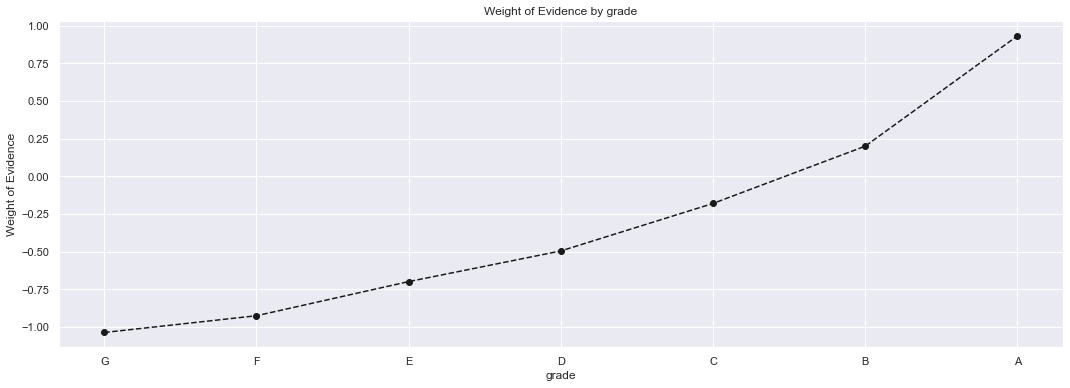

In [244]:
plot_by_woe(df_temp)

The category with the lowest weight of evidence is the reference category.

In [245]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     81   0.802469    0.002549     65.0    16.0     0.002386   
1           RENT  15094   0.850139    0.475057  12832.0  2262.0     0.471072   
2            OWN   2437   0.855970    0.076700   2086.0   351.0     0.076579   
3       MORTGAGE  14160   0.865537    0.445661  12256.0  1904.0     0.449927   
4           NONE      1   1.000000    0.000031      1.0     0.0     0.000037   

   prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0    0.003530 -0.391504             NaN       NaN  inf  
1    0.499007 -0.057610        0.047670  0.333894  inf  
2    0.077432 -0.011085        0.005831  0.046525  inf  
3    0.420031  0.068756        0.009566  0.079841  inf  
4    0.000000       inf        0.134463       inf  inf

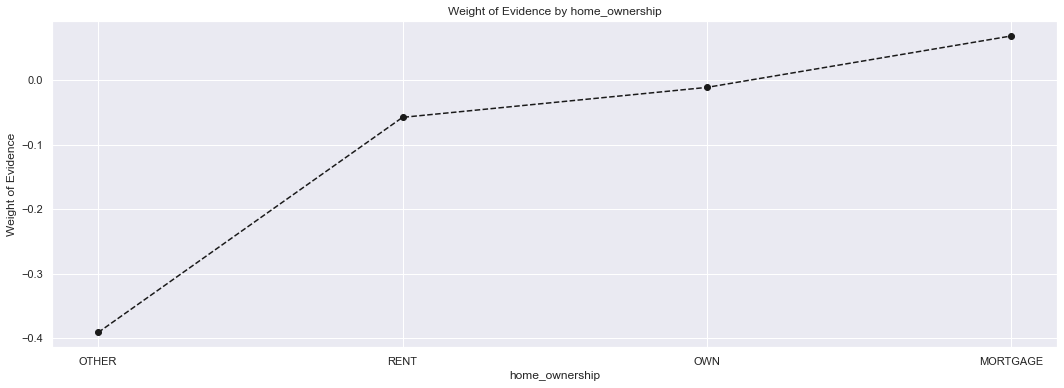

In [246]:
plot_by_woe(df_temp)

# Preprocessing discrete variables: Creating dummy variables

## Home ownership variable

Since OTHER, NONE, OWN, ANY have such a low number of observations, we will combine them into 1 dummy variable

In [247]:
df_inputs_prepr['home_ownership : RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership : RENT'], 
df_inputs_prepr['home_ownership : OTHER'], df_inputs_prepr['home_ownership : NONE']])

## Addr_state variable

In [248]:
df_inputs_prepr['addr_state'].unique()

array(['NY', 'CA', 'IL', 'OR', 'CT', 'TX', 'GA', 'CO', 'MN', 'AZ', 'WA',
       'PA', 'SC', 'NC', 'LA', 'MD', 'NJ', 'HI', 'OH', 'UT', 'MI', 'WV',
       'MA', 'NE', 'AL', 'VA', 'KY', 'MO', 'FL', 'MT', 'OK', 'KS', 'NV',
       'RI', 'DE', 'DC', 'SD', 'NH', 'IA', 'WI', 'WY', 'AR', 'NM', 'AK',
       'TN', 'MS', 'VT', 'IN', 'ID', 'ME'], dtype=object)

In [249]:
pd.options.display.max_rows = None
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

addr_state  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0          NE      3   0.666667    0.000094     2.0    1.0     0.000073   
1          NV    401   0.778055    0.012621   312.0   89.0     0.011454   
2          SD     55   0.781818    0.001731    43.0   12.0     0.001579   
3          FL   2284   0.824869    0.071885  1884.0  400.0     0.069163   
4          MO    554   0.826715    0.017436   458.0   96.0     0.016814   
5          MS     12   0.833333    0.000378    10.0    2.0     0.000367   
6          ID      6   0.833333    0.000189     5.0    1.0     0.000184   
7          NM    158   0.835443    0.004973   132.0   26.0     0.004846   
8          HI    149   0.838926    0.004690   125.0   24.0     0.004589   
9          CA   5693   0.839101    0.179177  4777.0  916.0     0.175367   
10         NH    137   0.839416    0.004312   115.0   22.0     0.004222   
11         WA    675   0.842963    0.021244   569.0  106.0     0.020888   
12         UT    205   0.843902    0.006452   173.0   32.0     0.006351   
13         MD    825   0.844848    0.025965   697.0  128.0     0.025587   
14         AK     65   0.846154    0.002046    55.0   10.0     0.002019   
15         GA   1112   0.848022    0.034998   943.0  169.0     0.034618   
16         OR    356   0.848315    0.011204   302.0   54.0     0.011087   
17         NJ   1471   0.851122    0.046297  1252.0  219.0     0.045962   
18         AZ    718   0.852368    0.022598   612.0  106.0     0.022467   
19         MI    579   0.854922    0.018223   495.0   84.0     0.018172   
20         NC    629   0.855326    0.019797   538.0   91.0     0.019750   
21         SC    372   0.862903    0.011708   321.0   51.0     0.011784   
22         KY    260   0.865385    0.008183   225.0   35.0     0.008260   
23         RI    159   0.867925    0.005004   138.0   21.0     0.005066   
24         CT    600   0.868333    0.018884   521.0   79.0     0.019126   
25         IL   1223   0.868357    0.038492  1062.0  161.0     0.038987   
26         OH    977   0.868987    0.030749   849.0  128.0     0.031167   
27         WI    367   0.869210    0.011551   319.0   48.0     0.011711   
28         MT     70   0.871429    0.002203    61.0    9.0     0.002239   
29         NY   3070   0.872638    0.096623  2679.0  391.0     0.098348   
30         OK    238   0.873950    0.007491   208.0   30.0     0.007636   
31         VA   1119   0.873995    0.035219   978.0  141.0     0.035903   
32         MA   1049   0.874166    0.033015   917.0  132.0     0.033664   
33         MN    485   0.876289    0.015265   425.0   60.0     0.015602   
34         LA    357   0.876751    0.011236   313.0   44.0     0.011490   
35         PA   1211   0.877787    0.038114  1063.0  148.0     0.039023   
36         CO    620   0.879032    0.019513   545.0   75.0     0.020007   
37         AL    374   0.879679    0.011771   329.0   45.0     0.012078   
38         KS    217   0.880184    0.006830   191.0   26.0     0.007012   
39         TX   2168   0.881919    0.068234  1912.0  256.0     0.070191   
40         VT     46   0.891304    0.001448    41.0    5.0     0.001505   
41         AR    195   0.892308    0.006137   174.0   21.0     0.006388   
42         WV    137   0.897810    0.004312   123.0   14.0     0.004515   
43         DE     98   0.897959    0.003084    88.0   10.0     0.003231   
44         TN     14   0.928571    0.000441    13.0    1.0     0.000477   
45         DC    175   0.937143    0.005508   164.0   11.0     0.006021   
46         WY     70   0.957143    0.002203    67.0    3.0     0.002460   
47         IA      5   1.000000    0.000157     5.0    0.0     0.000184   
48         ME      2   1.000000    0.000063     2.0    0.0     0.000073   
49         IN      8   1.000000    0.000252     8.0    0.0     0.000294   

    prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0     0.000221 -1.100155             NaN       NaN  inf  
1     0.019634 -0.538936        0.111388  0.561220  inf  
2  

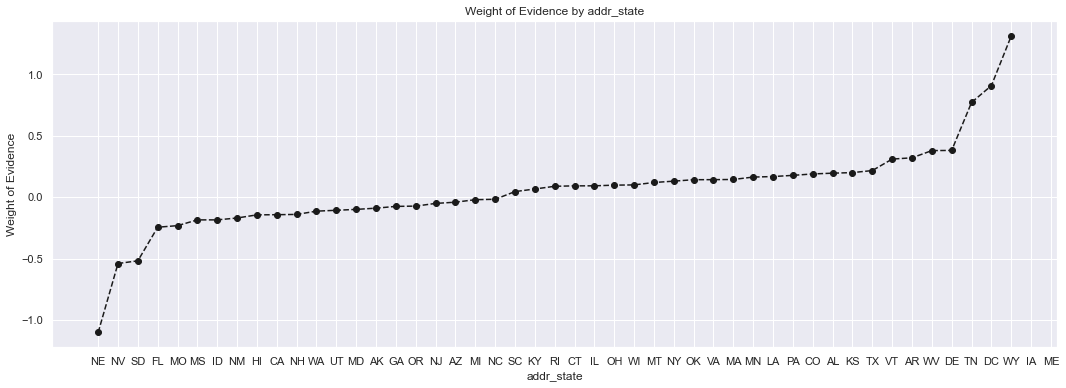

In [250]:
plot_by_woe(df_temp)

North Dakota (ND) is not present in the plot on the x-axis since there are no borrowers from that state.

In [251]:
#set all values of the state ND to 0 if there is no such column, else pass
if ['addr_state : ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state : ND'] = 0

Nebraska (NE) and Iowa (IA) have the lowest WOE, WOE of Maine (ME) and Idaho (ID) couldn't be calculated as there are no bad borrowers from that state (denominato = 0, => WOE = inf)

NE, IA, ME, ID have low number of observations. This might be the reason for their extreme WOE values. The graph says that for the other 46 states, WOE is more or less the same (except first 2 and last 2)

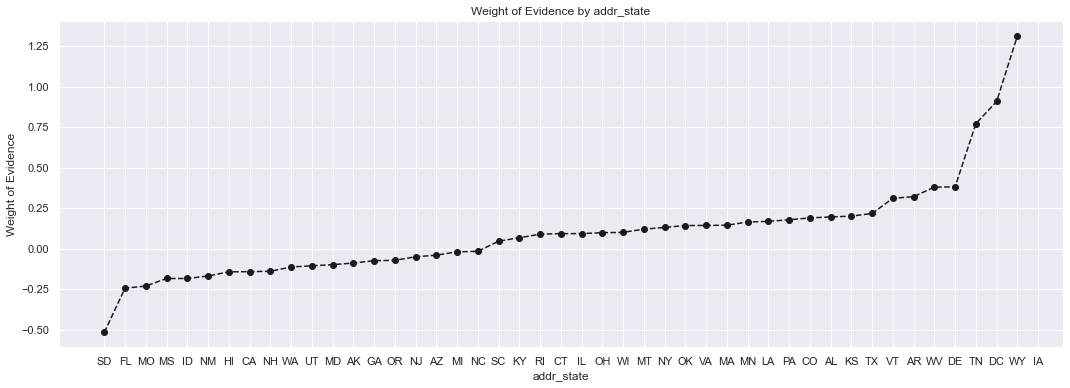

In [252]:
#Plotting without first 2 and last 2 states
plot_by_woe(df_temp.iloc[2:-2, :])

We were misguided that for the 46 states, WOE is almost the same. Now, we see it from a different perspective. We can group first 6 + ND (the state with information is assumed in the WORST category), last 6 in one category. Let's plot the remaining ones:

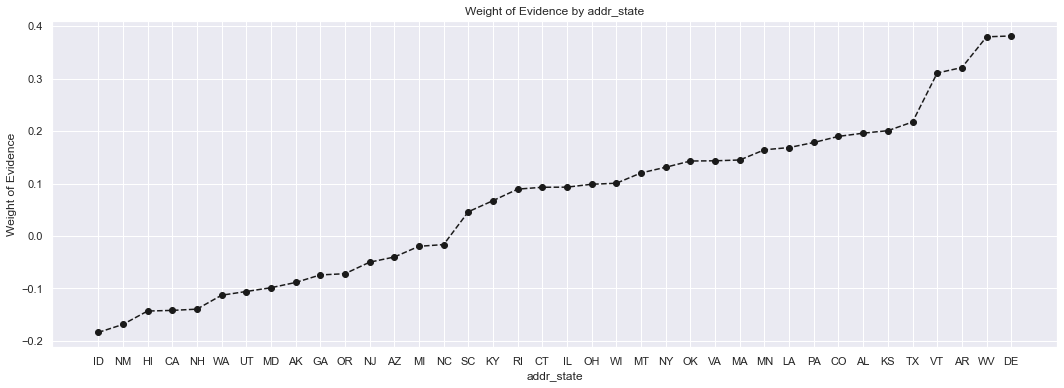

In [253]:
plot_by_woe(df_temp.iloc[6:-6, :])

Categories:
* NE to AL + ND
* NM, VA
* NY (2nd highest)
* OK to NC
* CA (highest number of borrowers)
* UT to NJ
* AR to MN
* RI to IN
* GA to OR
* WI, MT
* TX (3rd highest)
* IL, CT
* KS to MS
* WV to ID (low number of observations)

We just need to create dummy variables if we are combining more than 1 state into a category. Since, the single state dummy variables are already present.

In [254]:
#Creating the actual dummy variables
df_inputs_prepr['addr_state : ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state : ND'], df_inputs_prepr['addr_state : NE'],
df_inputs_prepr['addr_state : IA'], df_inputs_prepr['addr_state : NV'], df_inputs_prepr['addr_state : FL'], 
df_inputs_prepr['addr_state : HI'], df_inputs_prepr['addr_state : AL']])

df_inputs_prepr['addr_state : NM_VA'] = sum([df_inputs_prepr['addr_state : NM'], df_inputs_prepr['addr_state : VA']])

df_inputs_prepr['addr_state : OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state : OK'], 
df_inputs_prepr['addr_state : TN'], df_inputs_prepr['addr_state : MO'], df_inputs_prepr['addr_state : LA'],
df_inputs_prepr['addr_state : MD'], df_inputs_prepr['addr_state : NC']])

df_inputs_prepr['addr_state : UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state : UT'], df_inputs_prepr['addr_state : KY'],
df_inputs_prepr['addr_state : AZ'], df_inputs_prepr['addr_state : NJ']])

df_inputs_prepr['addr_state : AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state : AR'], df_inputs_prepr['addr_state : MI'],
df_inputs_prepr['addr_state : PA'], df_inputs_prepr['addr_state : OH'], df_inputs_prepr['addr_state : MN']])

df_inputs_prepr['addr_state : RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state : RI'], df_inputs_prepr['addr_state : MA'],
df_inputs_prepr['addr_state : DE'], df_inputs_prepr['addr_state : SD'], df_inputs_prepr['addr_state : IN']])

df_inputs_prepr['addr_state : GA_WA_OR'] = sum([df_inputs_prepr['addr_state : GA'], df_inputs_prepr['addr_state : WA'], 
df_inputs_prepr['addr_state : OR']])

df_inputs_prepr['addr_state : WI_MT'] = sum([df_inputs_prepr['addr_state : WI'], df_inputs_prepr['addr_state : MT']])

df_inputs_prepr['addr_state : IL_CT'] = sum([df_inputs_prepr['addr_state : IL'], df_inputs_prepr['addr_state : CT']])

df_inputs_prepr['addr_state : KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state : KS'], 
df_inputs_prepr['addr_state : SC'], df_inputs_prepr['addr_state : CO'], df_inputs_prepr['addr_state : VT'],
df_inputs_prepr['addr_state : AK'], df_inputs_prepr['addr_state : MS']])

df_inputs_prepr['addr_state : WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state : WV'], 
df_inputs_prepr['addr_state : NH'], df_inputs_prepr['addr_state : WY'], df_inputs_prepr['addr_state : DC'],
df_inputs_prepr['addr_state : ME'], df_inputs_prepr['addr_state : ID']])

## Verification_status variable

In [255]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  10222   0.840638    0.321720   8593.0  1629.0   
1     Source Verified   7995   0.853283    0.251629   6822.0  1173.0   
2        Not Verified  13556   0.872307    0.426652  11825.0  1731.0   

   prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0     0.315455    0.359365 -0.130321             NaN       NaN  0.012692  
1     0.250441    0.258769 -0.032714        0.012645  0.097607  0.012692  
2     0.434104    0.381866  0.128214        0.019024  0.160929  0.012692

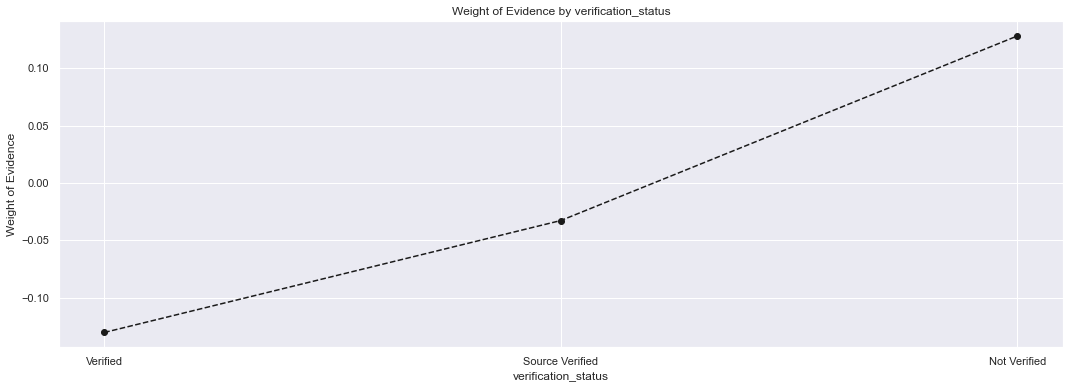

In [256]:
plot_by_woe(df_temp)

`Verification_status` should not be used in the PD model as it's IV is only approx. 0.02 which means it has no predictive power

## Purpose variable

In [257]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       small_business   1467   0.738241    0.046171   1083.0   384.0   
1     renewable_energy     84   0.797619    0.002644     67.0    17.0   
2          educational    260   0.811538    0.008183    211.0    49.0   
3                house    305   0.829508    0.009599    253.0    52.0   
4                other   3207   0.840661    0.100935   2696.0   511.0   
5              medical    552   0.842391    0.017373    465.0    87.0   
6               moving    473   0.845666    0.014887    400.0    73.0   
7   debt_consolidation  14894   0.850880    0.468763  12673.0  2221.0   
8             vacation    307   0.856678    0.009662    263.0    44.0   
9     home_improvement   2383   0.882081    0.075001   2102.0   281.0   
10         credit_card   4080   0.891912    0.128411   3639.0   441.0   
11      major_purchase   1755   0.899145    0.055236   1578.0   177.0   
12                 car   1253   0.901836    0.039436   1130.0   123.0   
13             wedding    753   0.903054    0.023699    680.0    73.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0      0.039758    0.084712 -0.756455             NaN       NaN  0.071742  
1      0.002460    0.003750 -0.421823        0.059378  0.334632  0.071742  
2      0.007746    0.010810 -0.333265        0.013919  0.088559  0.071742  
3      0.009288    0.011471 -0.211157        0.017970  0.122108  0.071742  
4      0.098972    0.112729 -0.130148        0.011153  0.081009  0.071742  
5      0.017070    0.019193 -0.117173        0.001730  0.012974  0.071742  
6      0.014684    0.016104 -0.092297        0.003275  0.024876  0.071742  
7      0.465235    0.489962 -0.051786        0.005214  0.040511  0.071742  
8      0.009655    0.009707 -0.005338        0.005798  0.046448  0.071742  
9      0.077166    0.061990  0.218987        0.025404  0.224325  0.071742  
10     0.133590    0.097287  0.317117        0.009830  0.098129  0.071742  
11     0.057930    0.039047  0.394461        0.007234  0.077344  0.071742  
12     0.041483    0.027134  0.424486        0.002690  0.030025  0.071742  
13     0.024963    0.016104  0.438331        0.001219  0.013845  0.071742

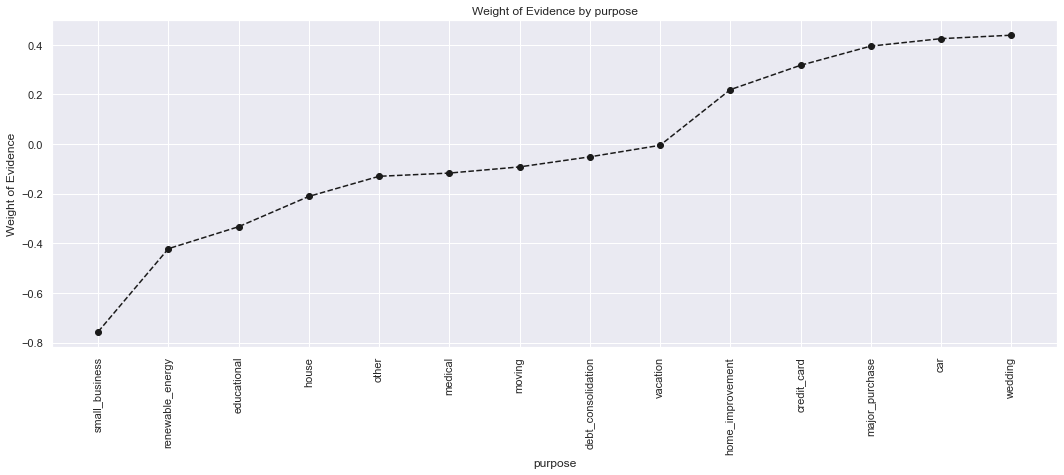

In [258]:
plot_by_woe(df_temp, rotation_of_x_axis_labels = 90)

`Purpose` should not be used in the PD model since it has weak predictive power since it's IV falls in the second category

In [259]:
df_inputs_prepr['purpose : SB_ED'] = sum([df_inputs_prepr['purpose : small_business'], df_inputs_prepr['purpose : educational']])

df_inputs_prepr['purpose : HO_OT_RE_ME'] = sum([df_inputs_prepr['purpose : house'], df_inputs_prepr['purpose : other'],
df_inputs_prepr['purpose : renewable_energy'], df_inputs_prepr['purpose : medical']])

df_inputs_prepr['purpose : WE_VA_DC'] = sum([df_inputs_prepr['purpose : wedding'], df_inputs_prepr['purpose : vacation'],
df_inputs_prepr['purpose : debt_consolidation']])

df_inputs_prepr['purpose : HI_MP_CA_CC'] = sum([df_inputs_prepr['purpose : home_improvement'], df_inputs_prepr['purpose : major_purchase'],
df_inputs_prepr['purpose : car'], df_inputs_prepr['purpose : credit_card']])


## initial_list_status variable

In [260]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  31773   0.857332         1.0  27240.0  4533.0   

   prop_n_good  prop_n_bad  WOE  diff_prop_good  diff_WOE   IV  
0          1.0         1.0  0.0             NaN       NaN  0.0

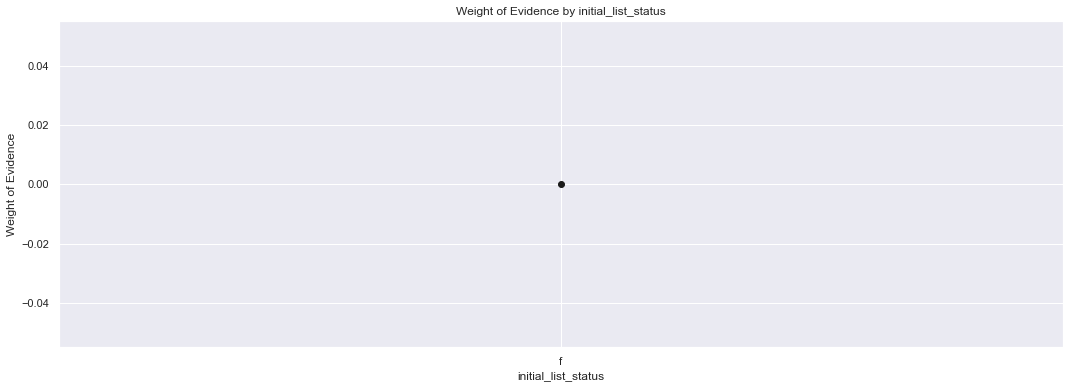

In [261]:
plot_by_woe(df_temp)

`initial_list_status` should not be used in the PD model since it has no predictive power as it's IV is approx. 0.02

# Preprocessing continuous variables: Automating calculations and visualizing results

The same function used for discrete variables can be used for continuous variables. Discrete variables don't have qualitative comparison (so, sorted them by WOE). But continuous variables have a quantitative comparison (so,leave them in natural order). For example, all values in $80k - $90k  are less than $90k - $100k

In [262]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WOE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [263]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  23278   0.888264    0.732635  20677.0  2601.0     0.759068   
1        60   8495   0.772572    0.267365   6563.0  1932.0     0.240932   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.573792  0.279823             NaN       NaN  0.157527  
1    0.426208 -0.570410        0.115691  0.850234  0.157527

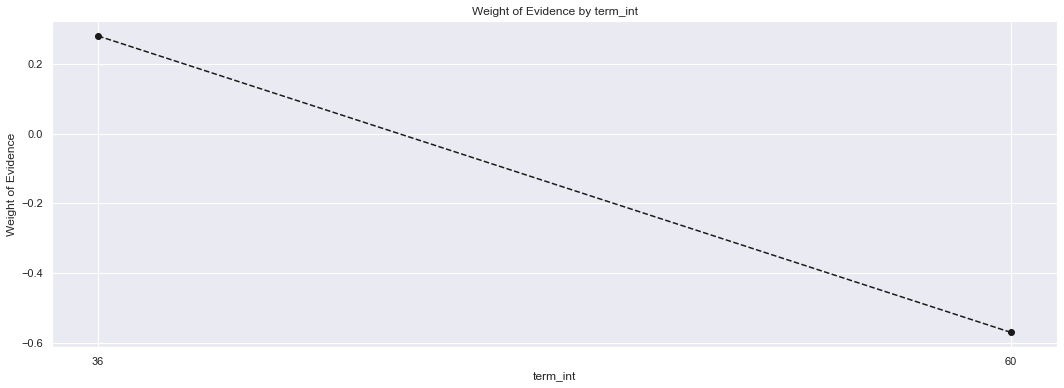

In [264]:
plot_by_woe(df_temp)

60 months loan are much riskier. We will give all 36 months term, value 1. Else, 0

In [265]:
df_inputs_prepr['term : 36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term : 60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

## emp_length variable

In [266]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0.,  3., 10.,  2.,  5.,  7.,  4.,  6.,  1.,  9.,  8.])

In [267]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0              0.0   4535   0.846086    0.142731  3837.0   698.0     0.140859   
1              1.0   2562   0.856362    0.080635  2194.0   368.0     0.080543   
2              2.0   3532   0.869762    0.111164  3072.0   460.0     0.112775   
3              3.0   3254   0.865704    0.102414  2817.0   437.0     0.103414   
4              4.0   2772   0.862193    0.087244  2390.0   382.0     0.087739   
5              5.0   2628   0.859209    0.082712  2258.0   370.0     0.082893   
6              6.0   1772   0.861738    0.055771  1527.0   245.0     0.056057   
7              7.0   1422   0.850914    0.044755  1210.0   212.0     0.044420   
8              8.0   1158   0.862694    0.036446   999.0   159.0     0.036674   
9              9.0   1001   0.875125    0.031505   876.0   125.0     0.032159   
10            10.0   7137   0.849096    0.224625  6060.0  1077.0     0.222467   

    prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0     0.153982 -0.089076             NaN       NaN  0.004983  
1     0.081182 -0.007904        0.010276  0.081172  0.004983  
2     0.101478  0.105555        0.013400  0.113459  0.004983  
3     0.096404  0.070192        0.004058  0.035363  0.004983  
4     0.084271  0.040326        0.003510  0.029867  0.004983  
5     0.081624  0.015429        0.002985  0.024896  0.004983  
6     0.054048  0.036500        0.002530  0.021070  0.004983  
7     0.046768 -0.051513        0.010824  0.088013  0.004983  
8     0.035076  0.044548        0.011780  0.096061  0.004983  
9     0.027576  0.153750        0.012431  0.109202  0.004983  
10    0.237591 -0.065772        0.026029  0.219522  0.004983

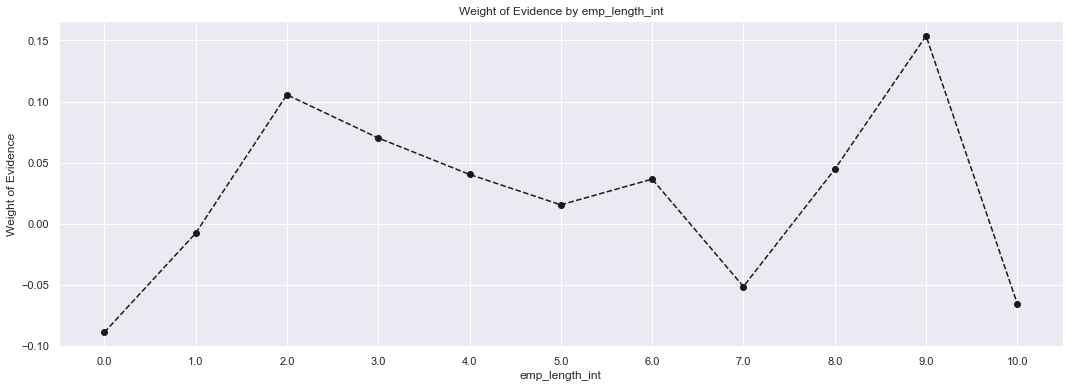

In [268]:
plot_by_woe(df_temp)

In [269]:
df_inputs_prepr['emp_length : 0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length : 1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length : 2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length : 5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length : 7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)
df_inputs_prepr['emp_length : 10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

## mths_since_issue_date variable

In [270]:
#type(df_inputs_prepr['mths_since_issue_d_date'])
df_inputs_prepr['mths_since_issue_d_date'].unique()

array([ 75.,  83.,  84.,  79.,  78.,  88.,  76.,  94.,  72.,  73.,  77.,
       102.,  80.,  74., 117., 108.,  85.,  89.,  87.,  95.,  86.,  91.,
        99.,  92.,  90.,  97.,  81., 100., 122., 115.,  82., 119., 118.,
        93., 110., 104., 107., 113.,  98., 109., 111., 120., 114., 101.,
       105., 106.,  96., 103., 123., 125., 112., 124., 116., 121., 126.])

In [271]:
#We want to divide the above values into 50 categories since it's easy to work with < 50 categories
#Fine classing
df_inputs_prepr['mths_since_issue_d_date_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d_date'], 50)
df_inputs_prepr['mths_since_issue_d_date_factor']

8321       (74.16, 75.24]
21102       (82.8, 83.88]
23008      (83.88, 84.96]
15102      (78.48, 79.56]
12607       (77.4, 78.48]
27133       (87.12, 88.2]
9331       (75.24, 76.32]
32794       (93.6, 94.68]
15219      (78.48, 79.56]
15189      (78.48, 79.56]
1441      (71.946, 73.08]
3434      (71.946, 73.08]
13797       (77.4, 78.48]
11578       (76.32, 77.4]
36493    (101.16, 102.24]
16483      (79.56, 80.64]
5144       (73.08, 74.16]
39124    (116.28, 117.36]
38076    (107.64, 108.72]
12309       (76.32, 77.4]
12649       (77.4, 78.48]
22916      (84.96, 86.04]
27721       (88.2, 89.28]
11433       (76.32, 77.4]
25904      (86.04, 87.12]
3126      (71.946, 73.08]
2360      (71.946, 73.08]
16768      (79.56, 80.64]
16701      (79.56, 80.64]
6432       (73.08, 74.16]
33168      (94.68, 95.76]
24298      (84.96, 86.04]
27308       (88.2, 89.28]
30269      (90.36, 91.44]
9061       (75.24, 76.32]
23192      (84.96, 86.04]
3375      (71.946, 73.08]
26898       (87.12, 88.2]
36238    (10

Each interval is from greater than 1st no. and less than or equal to 2nd no.

In [272]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_date_factor', df_targets_prepr)
df_temp

mths_since_issue_d_date_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                 (71.946, 73.08]   3547   0.829715    0.111636  2943.0   
1                  (73.08, 74.16]   1687   0.845287    0.053095  1426.0   
2                  (74.16, 75.24]   1627   0.850645    0.051207  1384.0   
3                  (75.24, 76.32]   1565   0.860703    0.049256  1347.0   
4                   (76.32, 77.4]   1517   0.855636    0.047745  1298.0   
5                   (77.4, 78.48]   1441   0.857044    0.045353  1235.0   
6                  (78.48, 79.56]   1367   0.821507    0.043024  1123.0   
7                  (79.56, 80.64]   1290   0.860465    0.040601  1110.0   
8                  (80.64, 81.72]   1152   0.859375    0.036257   990.0   
9                   (81.72, 82.8]   1035   0.864734    0.032575   895.0   
10                  (82.8, 83.88]   1114   0.865350    0.035061   964.0   
11                 (83.88, 84.96]   1012   0.887352    0.031851   898.0   
12                 (84.96, 86.04]   1818   0.860836    0.057218  1565.0   
13                 (86.04, 87.12]    860   0.831395    0.027067   715.0   
14                  (87.12, 88.2]    865   0.861272    0.027224   745.0   
15                  (88.2, 89.28]    897   0.880713    0.028232   790.0   
16                 (89.28, 90.36]    813   0.842558    0.025588   685.0   
17                 (90.36, 91.44]    719   0.856745    0.022629   616.0   
18                 (91.44, 92.52]    665   0.905263    0.020930   602.0   
19                  (92.52, 93.6]    594   0.902357    0.018695   536.0   
20                  (93.6, 94.68]    509   0.897839    0.016020   457.0   
21                 (94.68, 95.76]    468   0.865385    0.014729   405.0   
22                 (95.76, 96.84]    485   0.896907    0.015265   435.0   
23                 (96.84, 97.92]    478   0.864017    0.015044   413.0   
24                  (97.92, 99.0]    804   0.863184    0.025305   694.0   
25                 (99.0, 100.08]    321   0.909657    0.010103   292.0   
26               (100.08, 101.16]    301   0.867110    0.009473   261.0   
27               (101.16, 102.24]    275   0.894545    0.008655   246.0   
28               (102.24, 103.32]    252   0.861111    0.007931   217.0   
29                (103.32, 104.4]    236   0.855932    0.007428   202.0   
30                (104.4, 105.48]    214   0.883178    0.006735   189.0   
31               (105.48, 106.56]    205   0.853659    0.006452   175.0   
32               (106.56, 107.64]    197   0.888325    0.006200   175.0   
33               (107.64, 108.72]    175   0.857143    0.005508   150.0   
34                (108.72, 109.8]    146   0.821918    0.004595   120.0   
35                (109.8, 110.88]     73   0.849315    0.002298    62.0   
36               (110.88, 111.96]     23   0.826087    0.000724    19.0   
37               (111.96, 113.04]    129   0.868217    0.004060   112.0   
38               (113.04, 114.12]     53   0.886792    0.001668    47.0   
39                (114.12, 115.2]     59   0.830508    0.001857    49.0   
40                (115.2, 116.28]    123   0.821138    0.003871   101.0   
41               (116.28, 117.36]    182   0.829670    0.005728   151.0   
42               (117.36, 118.44]    138   0.855072    0.004343   118.0   
43               (118.44, 119.52]    137   0.817518    0.004312   112.0   
44                (119.52, 120.6]     71   0.802817    0.002235    57.0   
45                (120.6, 121.68]     31   0.806452    0.000976    25.0   
46               (121.68, 122.76]     37   0.837838    0.001165    31.0   
47               (122.76, 123.84]     13   0.769231    0.000409    10.0   
48               (123.84, 124.92]     26   0.807692    0.000818    21.0   
49                (124.92, 126.0]     27   1.000000    0.000850    27.0   

    n_bad  prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0   604.0     0.108040    0.133245 -0.209692             NaN       NaN  inf  
1   261.0     0.05234

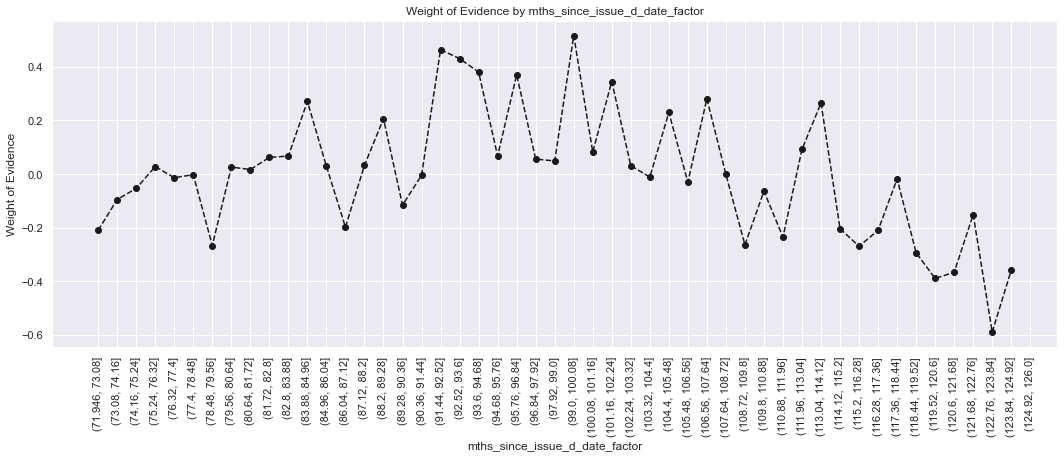

In [273]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

Since the first 3 values have a high WOE than rest of the categories, let's plot without these 3 categories

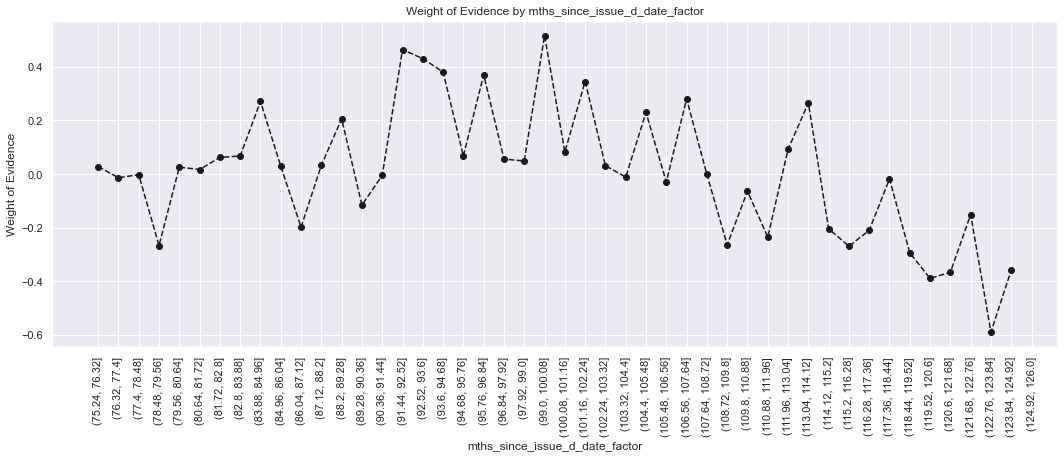

In [274]:
plot_by_woe(df_temp.iloc[3:, :], rotation_of_x_axis_labels=90)

    Surely check the no. of observations if the plot goes up and down.

In [275]:
df_inputs_prepr['mths_since_issue_d_date_factor : <38'] = np.where(df_inputs_prepr['mths_since_issue_d_date_factor'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d_date_factor : 38-39'] = np.where(df_inputs_prepr['mths_since_issue_d_date_factor'].isin(range(38,40)), 1, 0)
df_inputs_prepr['mths_since_issue_d_date_factor : 40-41'] = np.where(df_inputs_prepr['mths_since_issue_d_date_factor'].isin(range(40,42)), 1, 0)
df_inputs_prepr['mths_since_issue_d_date_factor : 42-48'] = np.where(df_inputs_prepr['mths_since_issue_d_date_factor'].isin(range(42,49)), 1, 0)
df_inputs_prepr['mths_since_issue_d_date_factor : 49-52'] = np.where(df_inputs_prepr['mths_since_issue_d_date_factor'].isin(range(49,53)), 1, 0)
df_inputs_prepr['mths_since_issue_d_date_factor : 53-64'] = np.where(df_inputs_prepr['mths_since_issue_d_date_factor'].isin(range(53,65)), 1, 0)
df_inputs_prepr['mths_since_issue_d_date_factor : 65-84'] = np.where(df_inputs_prepr['mths_since_issue_d_date_factor'].isin(range(65,85)), 1, 0)
df_inputs_prepr['mths_since_issue_d_date_factor : >84'] = np.where(df_inputs_prepr['mths_since_issue_d_date_factor'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d_date'].max()))), 1, 0)

## Interest rate variable

In [285]:
#df_inputs_prepr['int_rate'] = pd.to_numeric(df_inputs_prepr['int_rate'])
#df_inputs_prepr['int_rate'] = df_inputs_prepr['int_rate'].str.rstrip('%') 
#df_inputs_prepr['int_rate'] = pd.to_numeric(df_inputs_prepr['int_rate'])
#df_inputs_prepr['int_rate']
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_inputs_prepr['int_rate_factor']

8321     (15.772, 16.155]
21102      (8.871, 9.254]
23008     (9.637, 10.021]
15102     (9.637, 10.021]
12607    (16.155, 16.539]
27133       (7.337, 7.72]
9331     (16.155, 16.539]
32794    (12.321, 12.705]
15219    (12.705, 13.088]
15189    (13.471, 13.855]
1441        (6.57, 6.954]
3434     (18.072, 18.456]
13797    (10.788, 11.171]
11578      (5.803, 6.187]
36493    (10.788, 11.171]
16483      (6.954, 7.337]
5144        (7.72, 8.104]
39124    (13.855, 14.238]
38076    (14.238, 14.622]
12309    (11.938, 12.321]
12649       (7.337, 7.72]
22916     (9.637, 10.021]
27721    (13.471, 13.855]
11433      (6.954, 7.337]
25904       (7.72, 8.104]
3126     (16.539, 16.922]
2360     (18.456, 18.839]
16768    (10.021, 10.404]
16701      (9.254, 9.637]
6432     (20.756, 21.139]
33168    (10.788, 11.171]
24298      (5.401, 5.803]
27308    (14.622, 15.005]
30269     (9.637, 10.021]
9061       (8.487, 8.871]
23192    (13.471, 13.855]
3375        (7.337, 7.72]
26898    (15.388, 15.772]
36238    (13

In [286]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor' , df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.401, 5.803]    800   0.965000    0.025179   772.0   28.0   
1     (5.803, 6.187]    845   0.964497    0.026595   815.0   30.0   
2      (6.187, 6.57]    290   0.924138    0.009127   268.0   22.0   
3      (6.57, 6.954]    866   0.937644    0.027256   812.0   54.0   
4     (6.954, 7.337]    870   0.947126    0.027382   824.0   46.0   
5      (7.337, 7.72]   1582   0.933628    0.049791  1477.0  105.0   
6      (7.72, 8.104]   1348   0.936202    0.042426  1262.0   86.0   
7     (8.104, 8.487]     50   0.940000    0.001574    47.0    3.0   
8     (8.487, 8.871]    522   0.906130    0.016429   473.0   49.0   
9     (8.871, 9.254]    844   0.914692    0.026563   772.0   72.0   
10    (9.254, 9.637]    646   0.907121    0.020332   586.0   60.0   
11   (9.637, 10.021]   1250   0.905600    0.039342  1132.0  118.0   
12  (10.021, 10.404]   1057   0.880795    0.033267   931.0  126.0   
13  (10.404, 10.788]   1370   0.889781    0.043118  1219.0  151.0   
14  (10.788, 11.171]   1579   0.890437    0.049696  1406.0  173.0   
15  (11.171, 11.554]   1196   0.856187    0.037642  1024.0  172.0   
16  (11.554, 11.938]   1254   0.851675    0.039467  1068.0  186.0   
17  (11.938, 12.321]    922   0.842733    0.029018   777.0  145.0   
18  (12.321, 12.705]   1403   0.845331    0.044157  1186.0  217.0   
19  (12.705, 13.088]   1075   0.852093    0.033834   916.0  159.0   
20  (13.088, 13.471]    888   0.836712    0.027948   743.0  145.0   
21  (13.471, 13.855]   1560   0.847436    0.049098  1322.0  238.0   
22  (13.855, 14.238]    851   0.817861    0.026784   696.0  155.0   
23  (14.238, 14.622]    938   0.826226    0.029522   775.0  163.0   
24  (14.622, 15.005]    949   0.832455    0.029868   790.0  159.0   
25  (15.005, 15.388]    886   0.783296    0.027885   694.0  192.0   
26  (15.388, 15.772]    599   0.804674    0.018852   482.0  117.0   
27  (15.772, 16.155]    789   0.811153    0.024832   640.0  149.0   
28  (16.155, 16.539]    767   0.754889    0.024140   579.0  188.0   
29  (16.539, 16.922]    631   0.765452    0.019860   483.0  148.0   
30  (16.922, 17.305]    417   0.760192    0.013124   317.0  100.0   
31  (17.305, 17.689]    468   0.735043    0.014729   344.0  124.0   
32  (17.689, 18.072]    276   0.768116    0.008687   212.0   64.0   
33  (18.072, 18.456]    393   0.753181    0.012369   296.0   97.0   
34  (18.456, 18.839]    279   0.741935    0.008781   207.0   72.0   
35  (18.839, 19.222]    166   0.692771    0.005225   115.0   51.0   
36  (19.222, 19.606]    236   0.733051    0.007428   173.0   63.0   
37  (19.606, 19.989]    197   0.680203    0.006200   134.0   63.0   
38  (19.989, 20.373]    177   0.683616    0.005571   121.0   56.0   
39  (20.373, 20.756]     82   0.743902    0.002581    61.0   21.0   
40  (20.756, 21.139]    126   0.706349    0.003966    89.0   37.0   
41  (21.139, 21.523]     99   0.646465    0.003116    64.0   35.0   
42  (21.523, 21.906]     74   0.540541    0.002329    40.0   34.0   
43   (21.906, 22.29]     53   0.660377    0.001668    35.0   18.0   
44   (22.29, 22.673]     37   0.567568    0.001165    21.0   16.0   
45  (22.673, 23.056]     25   0.520000    0.000787    13.0   12.0   
46   (23.056, 23.44]     16   0.625000    0.000504    10.0    6.0   
47   (23.44, 23.823]     11   0.636364    0.000346     7.0    4.0   
48  (23.823, 24.207]     12   0.750000    0.000378     9.0    3.0   
49   (24.207, 24.59]      2   0.500000    0.000063     1.0    1.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0      0.028341    0.006177  1.523478             NaN       NaN  0.339135  
1      0.029919    0.006618  1.508688        0.000503  0.014789  0.339135  
2      0.009838    0.004853  0.706642        0.040359  0.802046  0.339135  
3      0.029809    0.011913  0.917214        0.013506  0.210572  0.339135  
4      0.030250    0.010148  1.092227        0.009482  0.175013  0.339135  
5      0.054222    0.023163  

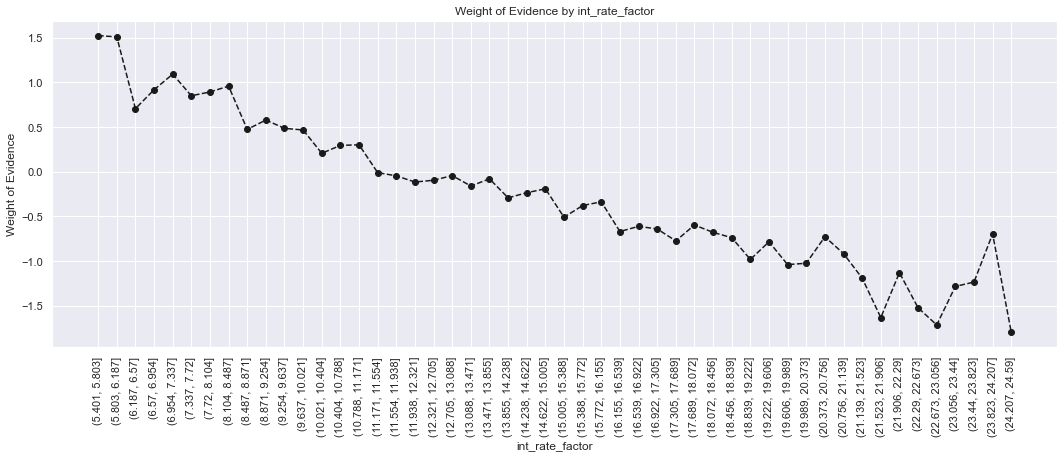

In [287]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

Greater the interest rate, higher WOE and greater probability of default.

In [288]:
df_inputs_prepr['int_rate : <9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate : 9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate : 12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate : 15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate : >20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

## funded_amt_factor variable

In [289]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)

In [290]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    273   0.831502    0.008592   227.0   46.0   
1     (1190.0, 1880.0]    646   0.852941    0.020332   551.0   95.0   
2     (1880.0, 2570.0]   1147   0.851787    0.036100   977.0  170.0   
3     (2570.0, 3260.0]   1261   0.867565    0.039688  1094.0  167.0   
4     (3260.0, 3950.0]    723   0.869986    0.022755   629.0   94.0   
5     (3950.0, 4640.0]   1513   0.873100    0.047619  1321.0  192.0   
6     (4640.0, 5330.0]   2299   0.856459    0.072357  1969.0  330.0   
7     (5330.0, 6020.0]   2198   0.883076    0.069178  1941.0  257.0   
8     (6020.0, 6710.0]    750   0.900000    0.023605   675.0   75.0   
9     (6710.0, 7400.0]   1355   0.879705    0.042646  1192.0  163.0   
10    (7400.0, 8090.0]   1957   0.859479    0.061593  1682.0  275.0   
11    (8090.0, 8780.0]    566   0.851590    0.017814   482.0   84.0   
12    (8780.0, 9470.0]    887   0.880496    0.027917   781.0  106.0   
13   (9470.0, 10160.0]   2733   0.864618    0.086016  2363.0  370.0   
14  (10160.0, 10850.0]    461   0.869848    0.014509   401.0   60.0   
15  (10850.0, 11540.0]    584   0.876712    0.018380   512.0   72.0   
16  (11540.0, 12230.0]   1927   0.864037    0.060649  1665.0  262.0   
17  (12230.0, 12920.0]    419   0.883055    0.013187   370.0   49.0   
18  (12920.0, 13610.0]    584   0.885274    0.018380   517.0   67.0   
19  (13610.0, 14300.0]    696   0.839080    0.021905   584.0  112.0   
20  (14300.0, 14990.0]    404   0.861386    0.012715   348.0   56.0   
21  (14990.0, 15680.0]   1692   0.847518    0.053253  1434.0  258.0   
22  (15680.0, 16370.0]    758   0.835092    0.023857   633.0  125.0   
23  (16370.0, 17060.0]    387   0.808786    0.012180   313.0   74.0   
24  (17060.0, 17750.0]    204   0.843137    0.006421   172.0   32.0   
25  (17750.0, 18440.0]    581   0.826162    0.018286   480.0  101.0   
26  (18440.0, 19130.0]    193   0.803109    0.006074   155.0   38.0   
27  (19130.0, 19820.0]    125   0.744000    0.003934    93.0   32.0   
28  (19820.0, 20510.0]   1263   0.859857    0.039751  1086.0  177.0   
29  (20510.0, 21200.0]    235   0.825532    0.007396   194.0   41.0   
30  (21200.0, 21890.0]    109   0.752294    0.003431    82.0   27.0   
31  (21890.0, 22580.0]    195   0.825641    0.006137   161.0   34.0   
32  (22580.0, 23270.0]    125   0.800000    0.003934   100.0   25.0   
33  (23270.0, 23960.0]     61   0.885246    0.001920    54.0    7.0   
34  (23960.0, 24650.0]    435   0.839080    0.013691   365.0   70.0   
35  (24650.0, 25340.0]    915   0.813115    0.028798   744.0  171.0   
36  (25340.0, 26030.0]     65   0.753846    0.002046    49.0   16.0   
37  (26030.0, 26720.0]     23   0.652174    0.000724    15.0    8.0   
38  (26720.0, 27410.0]     40   0.825000    0.001259    33.0    7.0   
39  (27410.0, 28100.0]    129   0.875969    0.004060   113.0   16.0   
40  (28100.0, 28790.0]     10   0.900000    0.000315     9.0    1.0   
41  (28790.0, 29480.0]     26   0.846154    0.000818    22.0    4.0   
42  (29480.0, 30170.0]    273   0.809524    0.008592   221.0   52.0   
43  (30170.0, 30860.0]      9   0.777778    0.000283     7.0    2.0   
44  (30860.0, 31550.0]     15   0.866667    0.000472    13.0    2.0   
45  (31550.0, 32240.0]     31   0.870968    0.000976    27.0    4.0   
46  (32240.0, 32930.0]     10   0.900000    0.000315     9.0    1.0   
47  (32930.0, 33620.0]     18   0.888889    0.000567    16.0    2.0   
48  (33620.0, 34310.0]     17   0.764706    0.000535    13.0    4.0   
49  (34310.0, 35000.0]    446   0.775785    0.014037   346.0  100.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE       IV  
0      0.008333    0.010148 -0.196994             NaN       NaN  0.03907  
1      0.020228    0.020957 -0.035445        0.021439  0.161549  0.03907  
2      0.035866    0.037503 -0.044614        0.001154  0.009170  0.03907  
3      0.040162    0.036841  0.086300        0.015778  0.130914  0.03907  
4      

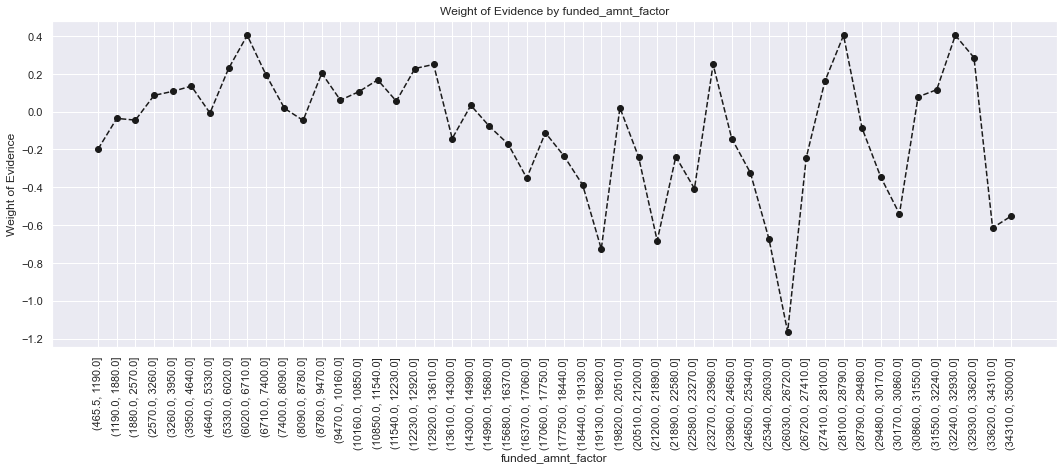

In [291]:
plot_by_woe(df_temp, 90)

`funded_amnt_factor` varies greatly. There seems to be no association between WOE and `funded_amt_factor`.So, we won't use this variable in our PD model.

## mths_since_earliest_cr_line variable

In [292]:
df_inputs_prepr['mths_since_earliest_cr_line'].unique()

array([486., 284., 290., 140., 221., 298., 187., 328., 260., 209., 219.,
       233., 157., 195., 224., 267., 241., 288., 265., 153., 429., 398.,
       382., 149., 214., 194., 158., 408., 210., 227., 345., 247., 323.,
       232., 230., 148., 220., 162., 295., 179., 137., 305., 252., 282.,
       218., 308., 240., 402., 159., 246., 136., 192., 304., 266., 281.,
       250., 198., 249., 229., 253., 188., 174., 287., 254., 175., 327.,
       434., 139., 259., 341., 205., 294., 272., 152., 362., 201., 292.,
       468., 183., 124., 193., 273., 256., 143., 352., 204., 356., 239.,
       376., 180., 248., 213., 333., 318., 145., 430., 268., 330., 339.,
       200., 313., 225., 177., 226., 186., 231., 203., 475., 258., 228.,
       173., 269., 461., 242., 217., 562., 285., 170., 212., 262., 286.,
       307., 263., 216., 379., 277., 123., 399., 168., 211., 410., 363.,
       523., 337., 132., 151., 322., 302., 544., 113., 306., 197., 301.,
       496., 264., 222., 133., 181., 135., 271., 21

In [293]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_inputs_prepr['mths_since_earliest_cr_line_factor']

8321       (481.06, 490.6]
21102     (280.72, 290.26]
23008     (280.72, 290.26]
15102     (137.62, 147.16]
12607     (213.94, 223.48]
27133      (290.26, 299.8]
9331      (185.32, 194.86]
32794     (318.88, 328.42]
15219      (252.1, 261.64]
15189      (204.4, 213.94]
1441      (213.94, 223.48]
3434      (223.48, 233.02]
13797      (156.7, 166.24]
11578      (194.86, 204.4]
36493     (223.48, 233.02]
16483     (261.64, 271.18]
5144      (233.02, 242.56]
39124     (185.32, 194.86]
38076     (261.64, 271.18]
12309     (280.72, 290.26]
12649     (261.64, 271.18]
22916      (147.16, 156.7]
27721     (423.82, 433.36]
11433      (395.2, 404.74]
25904     (376.12, 385.66]
3126       (147.16, 156.7]
2360      (213.94, 223.48]
16768     (185.32, 194.86]
16701      (156.7, 166.24]
6432      (404.74, 414.28]
33168      (204.4, 213.94]
24298     (223.48, 233.02]
27308      (147.16, 156.7]
30269      (337.96, 347.5]
9061       (242.56, 252.1]
23192     (318.88, 328.42]
3375      (223.48, 233.02]
2

In [294]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                   (108.523, 118.54]     98   0.806122    0.003084    79.0   
1                    (118.54, 128.08]    429   0.785548    0.013502   337.0   
2                    (128.08, 137.62]    676   0.818047    0.021276   553.0   
3                    (137.62, 147.16]    874   0.822654    0.027508   719.0   
4                     (147.16, 156.7]    847   0.841795    0.026658   713.0   
5                     (156.7, 166.24]   1197   0.866332    0.037673  1037.0   
6                    (166.24, 175.78]   1177   0.879354    0.037044  1035.0   
7                    (175.78, 185.32]   1270   0.888976    0.039971  1129.0   
8                    (185.32, 194.86]   1179   0.861747    0.037107  1016.0   
9                     (194.86, 204.4]   1714   0.851809    0.053945  1460.0   
10                    (204.4, 213.94]   1956   0.845603    0.061562  1654.0   
11                   (213.94, 223.48]   2119   0.850401    0.066692  1802.0   
12                   (223.48, 233.02]   2083   0.848296    0.065559  1767.0   
13                   (233.02, 242.56]   1639   0.856010    0.051585  1403.0   
14                    (242.56, 252.1]   1469   0.846154    0.046234  1243.0   
15                    (252.1, 261.64]   1272   0.858491    0.040034  1092.0   
16                   (261.64, 271.18]   1570   0.852866    0.049413  1339.0   
17                   (271.18, 280.72]   1176   0.867347    0.037013  1020.0   
18                   (280.72, 290.26]   1345   0.863197    0.042332  1161.0   
19                    (290.26, 299.8]    799   0.861076    0.025147   688.0   
20                    (299.8, 309.34]    701   0.880171    0.022063   617.0   
21                   (309.34, 318.88]    598   0.874582    0.018821   523.0   
22                   (318.88, 328.42]    718   0.860724    0.022598   618.0   
23                   (328.42, 337.96]    583   0.878216    0.018349   512.0   
24                    (337.96, 347.5]    536   0.873134    0.016870   468.0   
25                    (347.5, 357.04]    500   0.854000    0.015737   427.0   
26                   (357.04, 366.58]    396   0.881313    0.012463   349.0   
27                   (366.58, 376.12]    373   0.847185    0.011740   316.0   
28                   (376.12, 385.66]    277   0.902527    0.008718   250.0   
29                    (385.66, 395.2]    313   0.862620    0.009851   270.0   
30                    (395.2, 404.74]    264   0.882576    0.008309   233.0   
31                   (404.74, 414.28]    249   0.863454    0.007837   215.0   
32                   (414.28, 423.82]    152   0.875000    0.004784   133.0   
33                   (423.82, 433.36]    136   0.860294    0.004280   117.0   
34                    (433.36, 442.9]    120   0.883333    0.003777   106.0   
35                    (442.9, 452.44]    125   0.912000    0.003934   114.0   
36                   (452.44, 461.98]     93   0.806452    0.002927    75.0   
37                   (461.98, 471.52]    113   0.840708    0.003556    95.0   
38                   (471.52, 481.06]    100   0.880000    0.003147    88.0   
39                    (481.06, 490.6]     68   0.852941    0.002140    58.0   
40                    (490.6, 500.14]     70   0.971429    0.002203    68.0   
41                   (500.14, 509.68]     43   0.860465    0.001353    37.0   
42                   (509.68, 519.22]     48   0.895833    0.001511    43.0   
43                   (519.22, 528.76]     45   0.888889    0.001416    40.0   
44                    (528.76, 538.3]     43   0.813953    0.001353    35.0   
45                    (538.3, 547.84]     33   0.878788    0.001039    29.0   
46                   (547.84, 557.38]     25   0.840000    0.000787    21.0   
47                   (557.38, 566.92]     25   0.840000    0.000787    21.0   
48                   (566.92, 576.46]     35   0.828571    0.001102    29.0   
49                    (576.46, 586.0]    102   0.8431

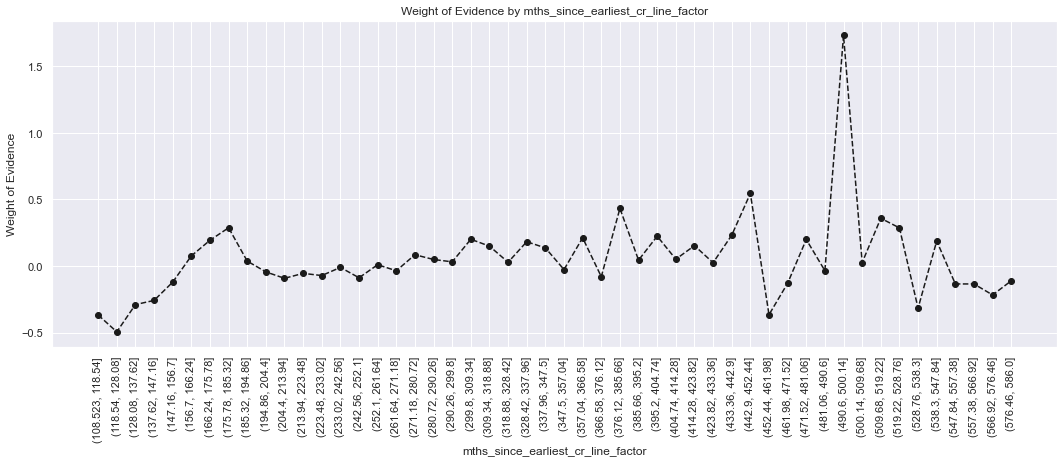

In [295]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [296]:
df_inputs_prepr['mths_since_earliest_cr_line_factor : <70'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(70)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor : 70-93'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(70,93)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor : 94-140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(94,140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor : 141-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(141-270)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor : 271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(271,352)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor : 353-410'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(353,410)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor : 411-563'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(411,563)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line_factor : >563'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line_factor'].isin(range(563, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

## Installment variable

In [297]:
unique_installment = []
for value in df_inputs_prepr['installment']:
    if value not in unique_installment:
        unique_installment.append(value)

In [298]:
len(unique_installment)

13410

When I used .unique() method, it didn't display all values in the list (it used ellipsis). To display all values I used a for loop and an if statement. To find the number of unique values, use len()

In [299]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

In [300]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.403, 41.43]    418   0.844498    0.013156   353.0   65.0   
1       (41.43, 67.17]    934   0.846895    0.029396   791.0  143.0   
2       (67.17, 92.91]   1259   0.848292    0.039625  1068.0  191.0   
3      (92.91, 118.65]   1652   0.863801    0.051994  1427.0  225.0   
4     (118.65, 144.39]   1724   0.866589    0.054260  1494.0  230.0   
5     (144.39, 170.13]   2258   0.872011    0.071067  1969.0  289.0   
6     (170.13, 195.87]   1994   0.870110    0.062758  1735.0  259.0   
7     (195.87, 221.61]   1857   0.858374    0.058446  1594.0  263.0   
8     (221.61, 247.35]   1602   0.866417    0.050420  1388.0  214.0   
9     (247.35, 273.09]   1733   0.873630    0.054543  1514.0  219.0   
10    (273.09, 298.83]   1427   0.848633    0.044912  1211.0  216.0   
11    (298.83, 324.57]   1826   0.884995    0.057470  1616.0  210.0   
12    (324.57, 350.31]   1641   0.857404    0.051648  1407.0  234.0   
13    (350.31, 376.05]   1326   0.842383    0.041734  1117.0  209.0   
14    (376.05, 401.79]   1224   0.848856    0.038523  1039.0  185.0   
15    (401.79, 427.53]    909   0.843784    0.028609   767.0  142.0   
16    (427.53, 453.27]    668   0.850299    0.021024   568.0  100.0   
17    (453.27, 479.01]    848   0.863208    0.026689   732.0  116.0   
18    (479.01, 504.75]    950   0.851579    0.029900   809.0  141.0   
19    (504.75, 530.49]    769   0.838752    0.024203   645.0  124.0   
20    (530.49, 556.23]    544   0.830882    0.017121   452.0   92.0   
21    (556.23, 581.97]    460   0.858696    0.014478   395.0   65.0   
22    (581.97, 607.71]    383   0.848564    0.012054   325.0   58.0   
23    (607.71, 633.45]    387   0.847545    0.012180   328.0   59.0   
24    (633.45, 659.19]    376   0.835106    0.011834   314.0   62.0   
25    (659.19, 684.93]    433   0.861432    0.013628   373.0   60.0   
26    (684.93, 710.67]    284   0.838028    0.008938   238.0   46.0   
27    (710.67, 736.41]    173   0.884393    0.005445   153.0   20.0   
28    (736.41, 762.15]    153   0.849673    0.004815   130.0   23.0   
29    (762.15, 787.89]    173   0.797688    0.005445   138.0   35.0   
30    (787.89, 813.63]    239   0.861925    0.007522   206.0   33.0   
31    (813.63, 839.37]    279   0.863799    0.008781   241.0   38.0   
32    (839.37, 865.11]    186   0.795699    0.005854   148.0   38.0   
33    (865.11, 890.85]    231   0.813853    0.007270   188.0   43.0   
34    (890.85, 916.59]     97   0.783505    0.003053    76.0   21.0   
35    (916.59, 942.33]     78   0.730769    0.002455    57.0   21.0   
36    (942.33, 968.07]     49   0.734694    0.001542    36.0   13.0   
37    (968.07, 993.81]     42   0.785714    0.001322    33.0    9.0   
38   (993.81, 1019.55]     13   0.692308    0.000409     9.0    4.0   
39  (1019.55, 1045.29]      7   1.000000    0.000220     7.0    0.0   
40  (1045.29, 1071.03]     16   0.812500    0.000504    13.0    3.0   
41  (1071.03, 1096.77]     31   0.935484    0.000976    29.0    2.0   
42  (1096.77, 1122.51]     21   0.904762    0.000661    19.0    2.0   
43  (1122.51, 1148.25]     27   0.888889    0.000850    24.0    3.0   
44  (1148.25, 1173.99]     10   0.900000    0.000315     9.0    1.0   
45  (1173.99, 1199.73]     13   0.923077    0.000409    12.0    1.0   
46  (1199.73, 1225.47]     16   0.937500    0.000504    15.0    1.0   
47  (1225.47, 1251.21]     13   0.923077    0.000409    12.0    1.0   
48  (1251.21, 1276.95]     17   0.823529    0.000535    14.0    3.0   
49  (1276.95, 1302.69]      3   0.666667    0.000094     2.0    1.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0      0.012959    0.014339 -0.101222             NaN       NaN  inf  
1      0.029038    0.031546 -0.082849        0.002397  0.018373  inf  
2      0.039207    0.042135 -0.072033        0.001397  0.010816  inf  
3      0.052386    0.049636  0.053927        0.015509  0.125960  inf  
4      0.054846    0.050739

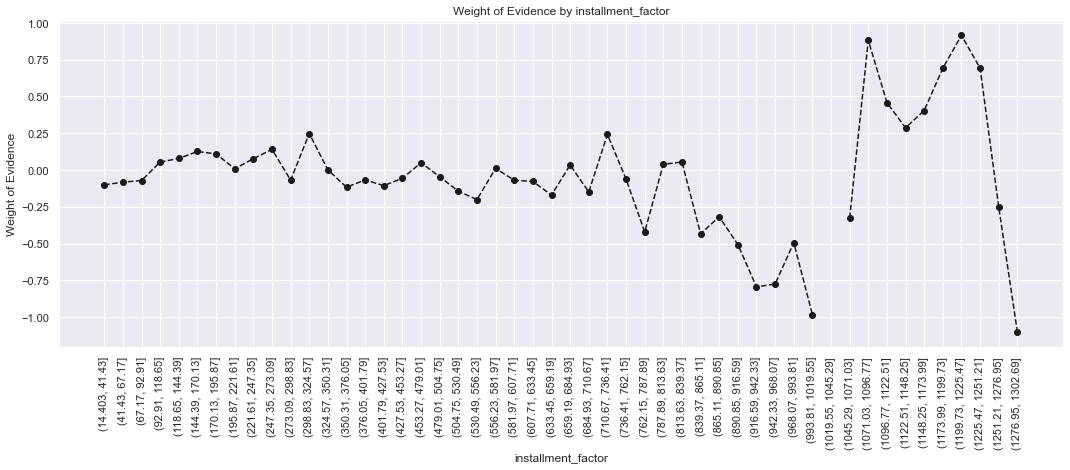

In [301]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [302]:
df_inputs_prepr['installment_factor : <183'] = np.where(df_inputs_prepr['installment_factor'].isin(range(183)), 1, 0)
df_inputs_prepr['installment_factor : 183-266'] = np.where(df_inputs_prepr['installment_factor'].isin(range(183,266)), 1, 0)
df_inputs_prepr['installment_factor : 267-517'] = np.where(df_inputs_prepr['installment_factor'].isin(range(267,517)), 1, 0)
df_inputs_prepr['installment_factor : 518-601'] = np.where(df_inputs_prepr['installment_factor'].isin(range(518,601)), 1, 0)
df_inputs_prepr['installment_factor : 602-880'] = np.where(df_inputs_prepr['installment_factor'].isin(range(602,880)), 1, 0)
df_inputs_prepr['installment_factor : 881-963'] = np.where(df_inputs_prepr['installment_factor'].isin(range(881,963)), 1, 0)
df_inputs_prepr['installment_factor : 964-1075'] = np.where(df_inputs_prepr['installment_factor'].isin(range(964,1075)), 1, 0)
df_inputs_prepr['installment_factor : 1076-1242'] = np.where(df_inputs_prepr['installment_factor'].isin(range(1076,1242)), 1, 0)
df_inputs_prepr['installment_factor : >1242'] = np.where(df_inputs_prepr['installment_factor'].isin(range(1242, int(df_inputs_prepr['installment'].max()))), 1, 0)

## delinq_2yrs variable

In [303]:
df_inputs_prepr['delinq_2yrs'].unique()

array([ 2,  0,  1,  4,  3,  5,  6,  9,  7, 11,  8], dtype=int64)

Since there are less number of categories, there is no need to use `pd.cut()`

In [304]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0             0  28296   0.859697    0.890567  24326.0  3970.0     0.893025   
1             1   2659   0.846559    0.083687   2251.0   408.0     0.082636   
2             2    564   0.803191    0.017751    453.0   111.0     0.016630   
3             3    171   0.842105    0.005382    144.0    27.0     0.005286   
4             4     50   0.780000    0.001574     39.0    11.0     0.001432   
5             5     18   0.833333    0.000567     15.0     3.0     0.000551   
6             6      8   0.875000    0.000252      7.0     1.0     0.000257   
7             7      3   0.666667    0.000094      2.0     1.0     0.000073   
8             8      2   0.500000    0.000063      1.0     1.0     0.000037   
9             9      1   1.000000    0.000031      1.0     0.0     0.000037   
10           11      1   1.000000    0.000031      1.0     0.0     0.000037   

    prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0     0.875800  0.019477             NaN       NaN  inf  
1     0.090007 -0.085440        0.013139  0.104917  inf  
2     0.024487 -0.386941        0.043367  0.301501  inf  
3     0.005956 -0.119326        0.038914  0.267615  inf  
4     0.002427 -0.527636        0.062105  0.408310  inf  
5     0.000662 -0.183865        0.053333  0.343772  inf  
6     0.000221  0.152608        0.041667  0.336472  inf  
7     0.000221 -1.100155        0.208333  1.252763  inf  
8     0.000221 -1.793303        0.166667  0.693147  inf  
9     0.000000       inf        0.500000       inf  inf  
10    0.000000       inf        0.000000       NaN  inf

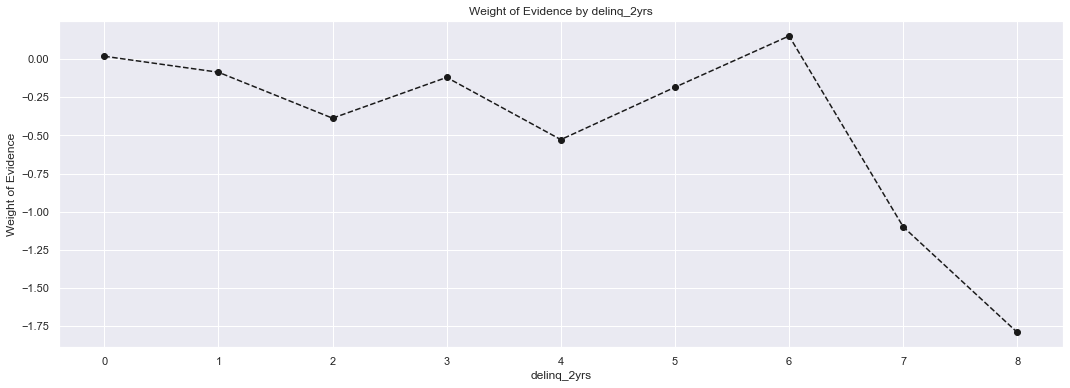

In [305]:
plot_by_woe(df_temp.iloc[:15,:])

To get rid of rows with WOE `inf`:
    
    df_temp = df_temp.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20], :]

In [306]:
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0             0  28296   0.859697    0.890567  24326.0  3970.0     0.893025   
1             1   2659   0.846559    0.083687   2251.0   408.0     0.082636   
2             2    564   0.803191    0.017751    453.0   111.0     0.016630   
3             3    171   0.842105    0.005382    144.0    27.0     0.005286   
4             4     50   0.780000    0.001574     39.0    11.0     0.001432   
5             5     18   0.833333    0.000567     15.0     3.0     0.000551   
6             6      8   0.875000    0.000252      7.0     1.0     0.000257   
7             7      3   0.666667    0.000094      2.0     1.0     0.000073   
8             8      2   0.500000    0.000063      1.0     1.0     0.000037   
9             9      1   1.000000    0.000031      1.0     0.0     0.000037   
10           11      1   1.000000    0.000031      1.0     0.0     0.000037   

    prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0     0.875800  0.019477             NaN       NaN  inf  
1     0.090007 -0.085440        0.013139  0.104917  inf  
2     0.024487 -0.386941        0.043367  0.301501  inf  
3     0.005956 -0.119326        0.038914  0.267615  inf  
4     0.002427 -0.527636        0.062105  0.408310  inf  
5     0.000662 -0.183865        0.053333  0.343772  inf  
6     0.000221  0.152608        0.041667  0.336472  inf  
7     0.000221 -1.100155        0.208333  1.252763  inf  
8     0.000221 -1.793303        0.166667  0.693147  inf  
9     0.000000       inf        0.500000       inf  inf  
10    0.000000       inf        0.000000       NaN  inf

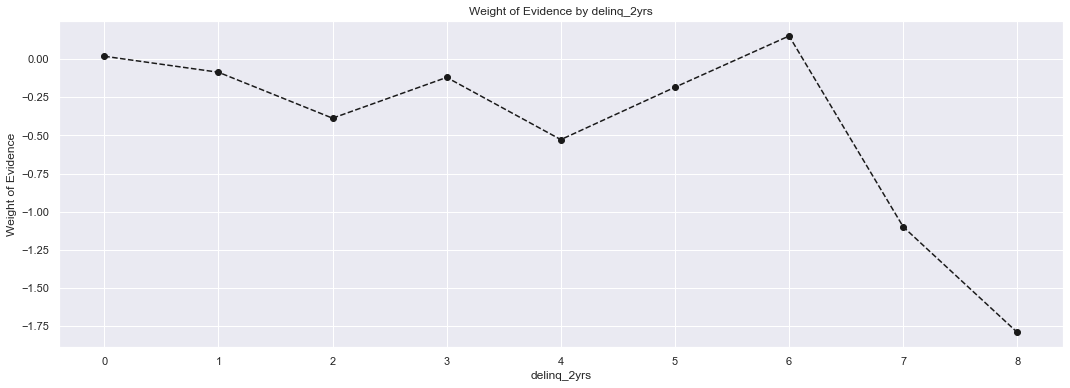

In [307]:
plot_by_woe(df_temp)

In [308]:
df_inputs_prepr['delinq_2yrs : <4'] = np.where(df_inputs_prepr['delinq_2yrs'].isin(range(0,3)), 1, 0)
df_inputs_prepr['delinq_2yrs : >=4'] = np.where(df_inputs_prepr['delinq_2yrs'].isin(range(4,21)), 1, 0)

## inq_last_6mths variable

In [309]:
df_inputs_prepr['inq_last_6mths'].unique()

array([3, 2, 0, 1, 4, 6, 7, 8, 5], dtype=int64)

In [310]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0               0  15433   0.881812    0.485727  13609.0  1824.0     0.499596   
1               1   8780   0.845900    0.276335   7427.0  1353.0     0.272651   
2               2   4643   0.833513    0.146130   3870.0   773.0     0.142070   
3               3   2455   0.797556    0.077267   1958.0   497.0     0.071880   
4               4    255   0.847059    0.008026    216.0    39.0     0.007930   
5               5    111   0.801802    0.003494     89.0    22.0     0.003267   
6               6     55   0.745455    0.001731     41.0    14.0     0.001505   
7               7     30   0.733333    0.000944     22.0     8.0     0.000808   
8               8     11   0.727273    0.000346      8.0     3.0     0.000294   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.402383  0.216397             NaN       NaN  0.047381  
1    0.298478 -0.090505        0.035912  0.306902  0.047381  
2    0.170527 -0.182572        0.012387  0.092067  0.047381  
3    0.109640 -0.422214        0.035957  0.239642  0.047381  
4    0.008604 -0.081586        0.049503  0.340628  0.047381  
5    0.004853 -0.395709        0.045257  0.314123  0.047381  
6    0.003088 -0.718788        0.056347  0.323079  0.047381  
7    0.001765 -0.781702        0.012121  0.062914  0.047381  
8    0.000662 -0.812473        0.006061  0.030772  0.047381

There are rows with `inf` or `-inf` as WOE. To get rid of those, do as below: (the above way is a lengthy one as it requires explicitly naming row indices)

In [311]:
df_temp = df_temp[(df_temp['WOE'] != float('inf')) & (df_temp['WOE'] != float('-inf'))]
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0               0  15433   0.881812    0.485727  13609.0  1824.0     0.499596   
1               1   8780   0.845900    0.276335   7427.0  1353.0     0.272651   
2               2   4643   0.833513    0.146130   3870.0   773.0     0.142070   
3               3   2455   0.797556    0.077267   1958.0   497.0     0.071880   
4               4    255   0.847059    0.008026    216.0    39.0     0.007930   
5               5    111   0.801802    0.003494     89.0    22.0     0.003267   
6               6     55   0.745455    0.001731     41.0    14.0     0.001505   
7               7     30   0.733333    0.000944     22.0     8.0     0.000808   
8               8     11   0.727273    0.000346      8.0     3.0     0.000294   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.402383  0.216397             NaN       NaN  0.047381  
1    0.298478 -0.090505        0.035912  0.306902  0.047381  
2    0.170527 -0.182572        0.012387  0.092067  0.047381  
3    0.109640 -0.422214        0.035957  0.239642  0.047381  
4    0.008604 -0.081586        0.049503  0.340628  0.047381  
5    0.004853 -0.395709        0.045257  0.314123  0.047381  
6    0.003088 -0.718788        0.056347  0.323079  0.047381  
7    0.001765 -0.781702        0.012121  0.062914  0.047381  
8    0.000662 -0.812473        0.006061  0.030772  0.047381

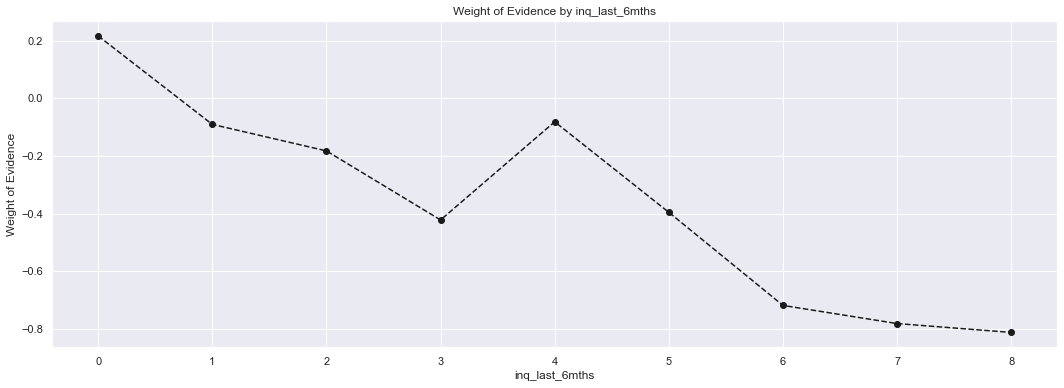

In [312]:
plot_by_woe(df_temp)

In [313]:
df_inputs_prepr['inq_last_6mths : 0-3'] = np.where(df_inputs_prepr['inq_last_6mths'].isin(range(0,4)), 1, 0)
df_inputs_prepr['inq_last_6mths : 4-6'] = np.where(df_inputs_prepr['inq_last_6mths'].isin(range(4,7)), 1, 0)
df_inputs_prepr['inq_last_6mths : >=6'] = np.where(df_inputs_prepr['inq_last_6mths'].isin(range(6,18)), 1, 0)

## open_acc variable

In [314]:
df_inputs_prepr['open_acc'].unique()

array([ 5, 15, 10,  4, 23,  3,  8,  6,  7, 13,  2, 24, 16, 12, 18, 11,  9,
       20, 14, 25, 17, 22, 21, 19, 29, 26, 28, 27, 32, 30, 36, 34, 31, 33,
       35, 38, 42, 39, 41, 44], dtype=int64)

In [315]:
df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'], 50)
df_inputs_prepr['open_acc_factor']

8321       (4.52, 5.36]
21102     (14.6, 15.44]
23008      (9.56, 10.4]
15102      (3.68, 4.52]
12607     (22.16, 23.0]
27133      (4.52, 5.36]
9331       (2.84, 3.68]
32794      (7.88, 8.72]
15219       (5.36, 6.2]
15189      (4.52, 5.36]
1441       (4.52, 5.36]
3434        (6.2, 7.04]
13797    (12.92, 13.76]
11578      (7.88, 8.72]
36493       (6.2, 7.04]
16483      (9.56, 10.4]
5144      (1.958, 2.84]
39124    (23.84, 24.68]
38076      (4.52, 5.36]
12309      (4.52, 5.36]
12649      (7.88, 8.72]
22916       (5.36, 6.2]
27721    (15.44, 16.28]
11433    (11.24, 12.08]
25904     (17.96, 18.8]
3126      (1.958, 2.84]
2360     (11.24, 12.08]
16768      (3.68, 4.52]
16701      (4.52, 5.36]
6432      (10.4, 11.24]
33168      (4.52, 5.36]
24298      (7.88, 8.72]
27308      (8.72, 9.56]
30269       (6.2, 7.04]
9061     (11.24, 12.08]
23192    (19.64, 20.48]
3375       (8.72, 9.56]
26898      (9.56, 10.4]
36238       (5.36, 6.2]
34876      (8.72, 9.56]
380         (6.2, 7.04]
7713      (10.4,

In [316]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc_factor', df_targets_prepr)
df_temp

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


open_acc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    (1.958, 2.84]    481   0.777547    0.015139   374.0  107.0     0.013730   
1     (2.84, 3.68]   1191   0.836272    0.037485   996.0  195.0     0.036564   
2     (3.68, 4.52]   1880   0.843617    0.059170  1586.0  294.0     0.058223   
3     (4.52, 5.36]   2507   0.867571    0.078903  2175.0  332.0     0.079846   
4      (5.36, 6.2]   3155   0.864976    0.099298  2729.0  426.0     0.100184   
5      (6.2, 7.04]   3219   0.863001    0.101312  2778.0  441.0     0.101982   
6     (7.04, 7.88]      0        NaN    0.000000     NaN    NaN          NaN   
7     (7.88, 8.72]   3147   0.860820    0.099046  2709.0  438.0     0.099449   
8     (8.72, 9.56]   3001   0.860047    0.094451  2581.0  420.0     0.094750   
9     (9.56, 10.4]   2565   0.851462    0.080729  2184.0  381.0     0.080176   
10   (10.4, 11.24]   2215   0.857788    0.069713  1900.0  315.0     0.069750   
11  (11.24, 12.08]   1808   0.867257    0.056904  1568.0  240.0     0.057562   
12  (12.08, 12.92]      0        NaN    0.000000     NaN    NaN          NaN   
13  (12.92, 13.76]   1550   0.858065    0.048784  1330.0  220.0     0.048825   
14   (13.76, 14.6]   1199   0.854045    0.037736  1024.0  175.0     0.037592   
15   (14.6, 15.44]    940   0.852128    0.029585   801.0  139.0     0.029405   
16  (15.44, 16.28]    741   0.881242    0.023322   653.0   88.0     0.023972   
17  (16.28, 17.12]    573   0.856894    0.018034   491.0   82.0     0.018025   
18  (17.12, 17.96]      0        NaN    0.000000     NaN    NaN          NaN   
19   (17.96, 18.8]    423   0.874704    0.013313   370.0   53.0     0.013583   
20   (18.8, 19.64]    321   0.841121    0.010103   270.0   51.0     0.009912   
21  (19.64, 20.48]    236   0.851695    0.007428   201.0   35.0     0.007379   
22  (20.48, 21.32]    202   0.841584    0.006358   170.0   32.0     0.006241   
23  (21.32, 22.16]    117   0.871795    0.003682   102.0   15.0     0.003744   
24   (22.16, 23.0]     73   0.863014    0.002298    63.0   10.0     0.002313   
25   (23.0, 23.84]      0        NaN    0.000000     NaN    NaN          NaN   
26  (23.84, 24.68]     66   0.893939    0.002077    59.0    7.0     0.002166   
27  (24.68, 25.52]     50   0.780000    0.001574    39.0   11.0     0.001432   
28  (25.52, 26.36]     27   0.814815    0.000850    22.0    5.0     0.000808   
29   (26.36, 27.2]     17   0.647059    0.000535    11.0    6.0     0.000404   
30   (27.2, 28.04]     21   0.809524    0.000661    17.0    4.0     0.000624   
31  (28.04, 28.88]      0        NaN    0.000000     NaN    NaN          NaN   
32  (28.88, 29.72]      9   0.888889    0.000283     8.0    1.0     0.000294   
33  (29.72, 30.56]     10   0.700000    0.000315     7.0    3.0     0.000257   
34   (30.56, 31.4]      6   0.666667    0.000189     4.0    2.0     0.000147   
35   (31.4, 32.24]      4   1.000000    0.000126     4.0    0.0     0.000147   
36  (32.24, 33.08]      3   0.333333    0.000094     1.0    2.0     0.000037   
37  (33.08, 33.92]      0        NaN    0.000000     NaN    NaN          NaN   
38  (33.92, 34.76]      5   0.800000    0.000157     4.0    1.0     0.000147   
39   (34.76, 35.6]      4   0.750000    0.000126     3.0    1.0     0.000110   
40   (35.6, 36.44]      2   1.000000    0.000063     2.0    0.0     0.000073   
41  (36.44, 37.28]      0        NaN    0.000000     NaN    NaN          NaN   
42  (37.28, 38.12]      1   0.000000    0.000031     0.0    1.0     0.000000   
43  (38.12, 38.96]      0        NaN    0.000000     NaN    NaN          NaN   
44   (38.96, 39.8]      1   1.000000    0.000031     1.0    0.0     0.000037   
45   (39.8, 40.64]      0        NaN    0.000000     NaN    NaN          NaN   
46  (40.64, 41.48]      1   1.000000    0.000031     1.0    0.0     0.000037   
47  (41.48, 42.32]      1   1.000000    0.000031     1.0    0.0     0.000037   
48  (42.32, 43.16]      0        NaN    0.000000     NaN    NaN          NaN   
49 

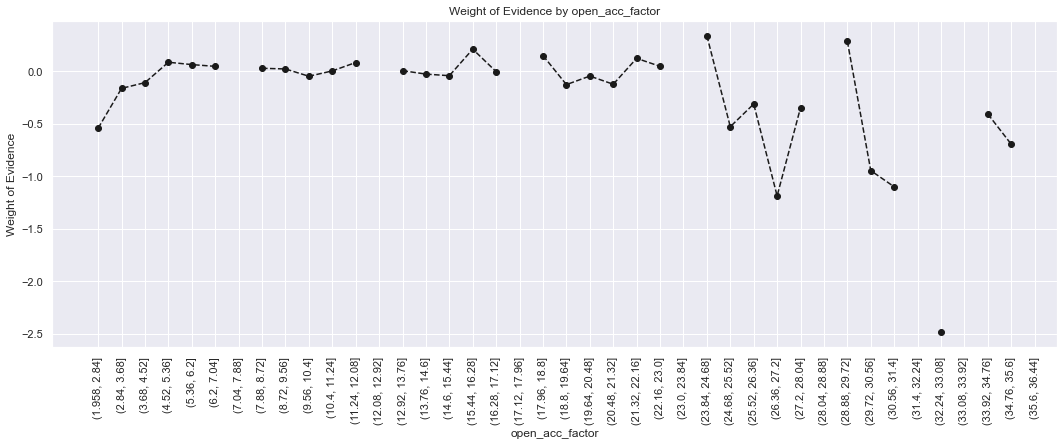

In [317]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

There is no need to remove `inf`, `-inf` and `NaN` as the plot function itself ignored those observations

In [318]:
df_inputs_prepr['open_acc_factor : 0'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(0)), 1, 0)
df_inputs_prepr['open_acc_factor : 1-3'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(1,3)), 1, 0)
df_inputs_prepr['open_acc_factor : 3-11'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(3,12)), 1, 0)
df_inputs_prepr['open_acc_factor : 12-25'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(12,26)), 1, 0)
df_inputs_prepr['open_acc_factor : 26-33'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(26,34)), 1, 0)
df_inputs_prepr['open_acc_factor : >34'] = np.where(df_inputs_prepr['open_acc_factor'].isin(range(34, int(df_inputs_prepr['open_acc'].max()))), 1, 0)

## pub_rec variable

In [319]:
df_inputs_prepr['pub_rec'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [320]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr) 
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0  30072   0.861798    0.946464  25916.0  4156.0     0.951395   
1        1   1654   0.776904    0.052057   1285.0   369.0     0.047173   
2        2     39   0.794872    0.001227     31.0     8.0     0.001138   
3        3      7   1.000000    0.000220      7.0     0.0     0.000257   
4        4      1   1.000000    0.000031      1.0     0.0     0.000037   

   prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0    0.916832  0.037005             NaN       NaN  inf  
1    0.081403 -0.545585        0.084894  0.582590  inf  
2    0.001765 -0.438757        0.017967  0.106828  inf  
3    0.000000       inf        0.205128       inf  inf  
4    0.000000       inf        0.000000       NaN  inf

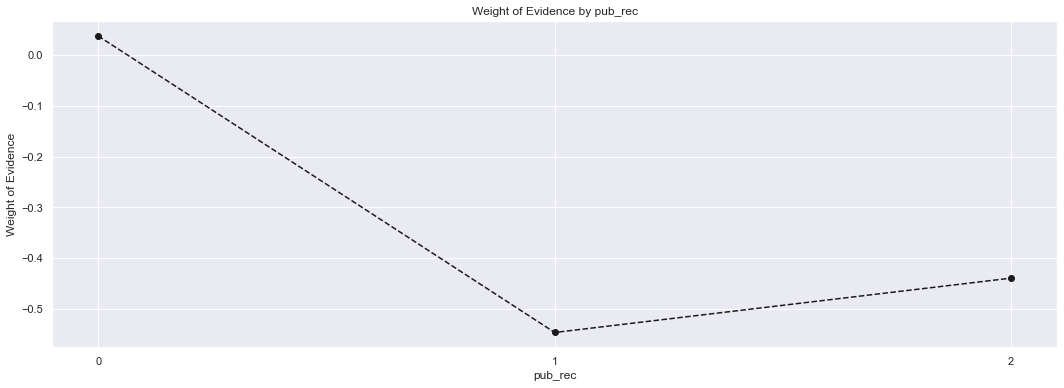

In [321]:
plot_by_woe(df_temp)

In [322]:
#removing all inf values
df_temp = df_temp[df_temp['WOE'] != float('inf')]
df_temp

pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        0  30072   0.861798    0.946464  25916.0  4156.0     0.951395   
1        1   1654   0.776904    0.052057   1285.0   369.0     0.047173   
2        2     39   0.794872    0.001227     31.0     8.0     0.001138   

   prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0    0.916832  0.037005             NaN       NaN  inf  
1    0.081403 -0.545585        0.084894  0.582590  inf  
2    0.001765 -0.438757        0.017967  0.106828  inf

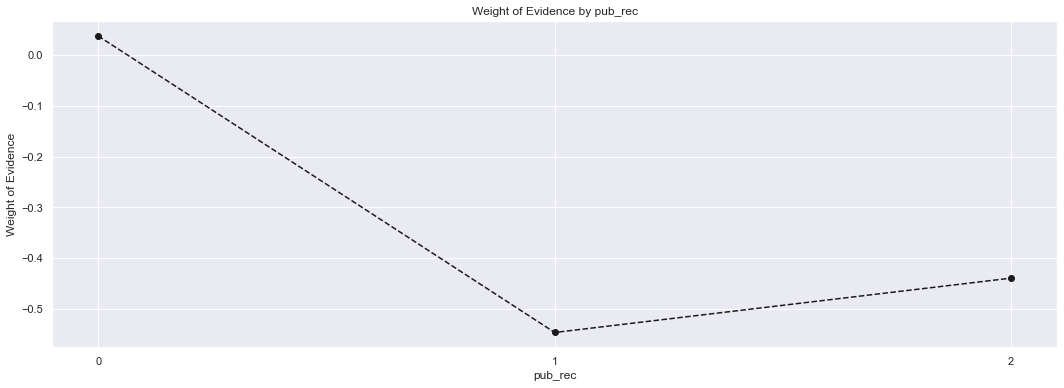

In [323]:
plot_by_woe(df_temp)

In [324]:
df_inputs_prepr['pub_rec : 0-2'] = np.where(df_inputs_prepr['pub_rec'].isin(range(0,3)), 1, 0)
df_inputs_prepr['pub_rec : 3-4'] = np.where(df_inputs_prepr['pub_rec'].isin(range(3,5)), 1, 0)
df_inputs_prepr['pub_rec : 5-7'] = np.where(df_inputs_prepr['pub_rec'].isin(range(5,7)), 1, 0)
df_inputs_prepr['pub_rec : >7'] = np.where(df_inputs_prepr['pub_rec'].isin(range(7,int(df_inputs_prepr['pub_rec'].max()))), 1, 0)

## total_acc variable

In [325]:
df_inputs_prepr['total_acc'].unique()

array([21, 47, 63,  8, 41, 15,  9, 16, 13, 30, 19, 36, 10, 29,  3, 34, 11,
       32, 40, 39,  5, 17, 28, 26, 12, 20, 25, 22, 38, 43, 37, 42,  7, 45,
       23, 24, 27, 48, 54, 18, 33, 31,  4, 59, 14, 49, 35, 51, 53, 50,  6,
       66, 44, 46, 52, 56, 55, 60, 62, 57,  2, 58, 68, 61, 67, 73, 75, 74,
       81, 90, 80, 65, 64, 78, 70, 76, 71, 79], dtype=int64)

In [326]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

In [327]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


total_acc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0     (1.912, 3.76]    145   0.800000    0.004564   116.0   29.0     0.004258   
1      (3.76, 5.52]    766   0.828982    0.024109   635.0  131.0     0.023311   
2      (5.52, 7.28]   1221   0.841933    0.038429  1028.0  193.0     0.037739   
3      (7.28, 9.04]   1650   0.840000    0.051931  1386.0  264.0     0.050881   
4      (9.04, 10.8]    942   0.843949    0.029648   795.0  147.0     0.029185   
5     (10.8, 12.56]   2073   0.848046    0.065244  1758.0  315.0     0.064537   
6    (12.56, 14.32]   2262   0.852343    0.071193  1928.0  334.0     0.070778   
7    (14.32, 16.08]   2367   0.858471    0.074497  2032.0  335.0     0.074596   
8    (16.08, 17.84]   1159   0.850733    0.036478   986.0  173.0     0.036197   
9     (17.84, 19.6]   2214   0.857724    0.069682  1899.0  315.0     0.069714   
10    (19.6, 21.36]   2286   0.872703    0.071948  1995.0  291.0     0.073238   
11   (21.36, 23.12]   2040   0.873529    0.064205  1782.0  258.0     0.065419   
12   (23.12, 24.88]    999   0.842843    0.031442   842.0  157.0     0.030910   
13   (24.88, 26.64]   1762   0.876277    0.055456  1544.0  218.0     0.056681   
14    (26.64, 28.4]   1661   0.864539    0.052277  1436.0  225.0     0.052717   
15    (28.4, 30.16]   1492   0.858579    0.046958  1281.0  211.0     0.047026   
16   (30.16, 31.92]    643   0.864697    0.020237   556.0   87.0     0.020411   
17   (31.92, 33.68]   1141   0.864154    0.035911   986.0  155.0     0.036197   
18   (33.68, 35.44]    962   0.863825    0.030277   831.0  131.0     0.030507   
19    (35.44, 37.2]    794   0.861461    0.024990   684.0  110.0     0.025110   
20    (37.2, 38.96]    371   0.840970    0.011677   312.0   59.0     0.011454   
21   (38.96, 40.72]    603   0.854063    0.018978   515.0   88.0     0.018906   
22   (40.72, 42.48]    474   0.862869    0.014918   409.0   65.0     0.015015   
23   (42.48, 44.24]    385   0.825974    0.012117   318.0   67.0     0.011674   
24    (44.24, 46.0]    299   0.846154    0.009411   253.0   46.0     0.009288   
25    (46.0, 47.76]    134   0.888060    0.004217   119.0   15.0     0.004369   
26   (47.76, 49.52]    216   0.837963    0.006798   181.0   35.0     0.006645   
27   (49.52, 51.28]    162   0.925926    0.005099   150.0   12.0     0.005507   
28   (51.28, 53.04]    143   0.902098    0.004501   129.0   14.0     0.004736   
29    (53.04, 54.8]     52   0.903846    0.001637    47.0    5.0     0.001725   
30    (54.8, 56.56]     81   0.851852    0.002549    69.0   12.0     0.002533   
31   (56.56, 58.32]     61   0.901639    0.001920    55.0    6.0     0.002019   
32   (58.32, 60.08]     48   0.812500    0.001511    39.0    9.0     0.001432   
33   (60.08, 61.84]     35   0.857143    0.001102    30.0    5.0     0.001101   
34    (61.84, 63.6]    102   0.872549    0.003210    89.0   13.0     0.003267   
35    (63.6, 65.36]      6   1.000000    0.000189     6.0    0.0     0.000220   
36   (65.36, 67.12]      7   0.857143    0.000220     6.0    1.0     0.000220   
37   (67.12, 68.88]      1   1.000000    0.000031     1.0    0.0     0.000037   
38   (68.88, 70.64]      1   0.000000    0.000031     0.0    1.0     0.000000   
39    (70.64, 72.4]      1   1.000000    0.000031     1.0    0.0     0.000037   
40    (72.4, 74.16]      2   0.500000    0.000063     1.0    1.0     0.000037   
41   (74.16, 75.92]      2   1.000000    0.000063     2.0    0.0     0.000073   
42   (75.92, 77.68]      2   1.000000    0.000063     2.0    0.0     0.000073   
43   (77.68, 79.44]      3   1.000000    0.000094     3.0    0.0     0.000110   
44    (79.44, 81.2]      2   1.000000    0.000063     2.0    0.0     0.000073   
45    (81.2, 82.96]      0        NaN    0.000000     NaN    NaN          NaN   
46   (82.96, 84.72]      0        NaN    0.000000     NaN    NaN          NaN   
47   (84.72, 86.48]      0        NaN    0.000000     NaN    NaN          NaN   
48   (86.48, 88.24]      0        

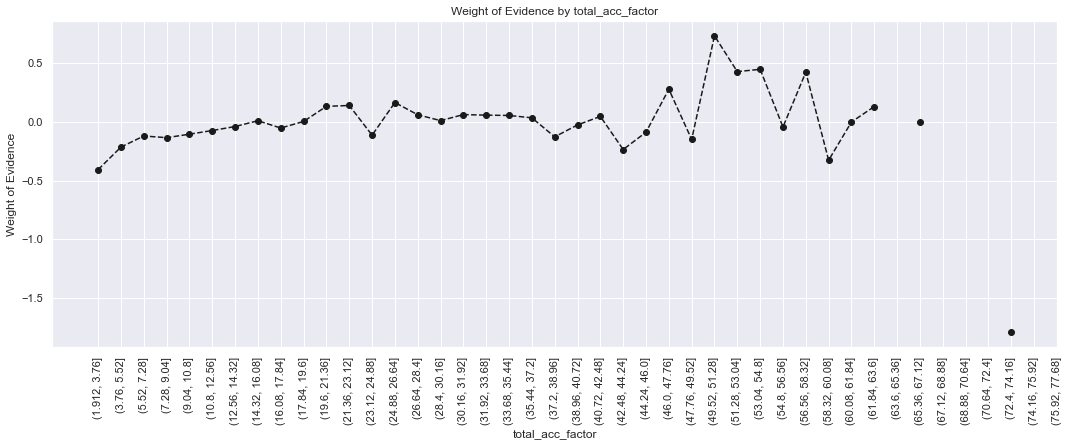

In [328]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [329]:
df_inputs_prepr['total_acc_factor : <=27'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(0,28)), 1, 0)
df_inputs_prepr['total_acc_factor : 28-30'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(18,30)), 1, 0)
df_inputs_prepr['total_acc_factor : 30-45'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(30,45)), 1, 0)
df_inputs_prepr['total_acc_factor : 45-60'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(45,60)), 1, 0)
df_inputs_prepr['total_acc_factor : 60-72'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(60,72)), 1, 0)
df_inputs_prepr['total_acc_factor : >72'] = np.where(df_inputs_prepr['total_acc_factor'].isin(range(72, int(df_inputs_prepr['total_acc'].max()))), 1, 0)

## acc_now_delinq variable

In [330]:
df_inputs_prepr['acc_now_delinq'].unique()

array([0], dtype=int64)

In [331]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0               0  31773   0.857332         1.0  27240.0  4533.0          1.0   

   prop_n_bad  WOE  diff_prop_good  diff_WOE   IV  
0         1.0  0.0             NaN       NaN  0.0

In [ ]:
#df_temp = df_temp.iloc[[0,1,2,3,5], :]

In [ ]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [332]:
df_inputs_prepr['acc_now_delinq : 0'] = np.where(df_inputs_prepr['acc_now_delinq'].isin(range(0)), 1, 0)
df_inputs_prepr['acc_now_delinq : 1-5'] = np.where(df_inputs_prepr['acc_now_delinq'].isin(range(1, 5)), 1, 0) 

In [333]:
df_inputs_prepr.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

## Annual income variable

In [334]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_inputs_prepr['annual_inc_factor']

8321       (-1915.92, 123998.4]
21102      (-1915.92, 123998.4]
23008      (-1915.92, 123998.4]
15102      (-1915.92, 123998.4]
12607      (-1915.92, 123998.4]
27133      (-1915.92, 123998.4]
9331       (-1915.92, 123998.4]
32794      (-1915.92, 123998.4]
15219      (-1915.92, 123998.4]
15189      (-1915.92, 123998.4]
1441       (-1915.92, 123998.4]
3434       (123998.4, 243916.8]
13797      (-1915.92, 123998.4]
11578      (-1915.92, 123998.4]
36493      (-1915.92, 123998.4]
16483      (123998.4, 243916.8]
5144       (-1915.92, 123998.4]
39124      (-1915.92, 123998.4]
38076      (-1915.92, 123998.4]
12309      (-1915.92, 123998.4]
12649      (-1915.92, 123998.4]
22916      (-1915.92, 123998.4]
27721      (-1915.92, 123998.4]
11433      (-1915.92, 123998.4]
25904      (-1915.92, 123998.4]
3126       (-1915.92, 123998.4]
2360       (-1915.92, 123998.4]
16768      (-1915.92, 123998.4]
16701      (-1915.92, 123998.4]
6432       (-1915.92, 123998.4]
33168      (-1915.92, 123998.4]
24298   

In [335]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-1915.92, 123998.4]  29248   0.854178    0.920530  24983.0  4265.0   
1     (123998.4, 243916.8]   2232   0.894265    0.070248   1996.0   236.0   
2     (243916.8, 363835.2]    197   0.913706    0.006200    180.0    17.0   
3     (363835.2, 483753.6]     32   0.906250    0.001007     29.0     3.0   
4     (483753.6, 603672.0]     20   0.750000    0.000629     15.0     5.0   
5     (603672.0, 723590.4]     13   0.692308    0.000409      9.0     4.0   
6     (723590.4, 843508.8]     14   0.857143    0.000441     12.0     2.0   
7     (843508.8, 963427.2]      4   1.000000    0.000126      4.0     0.0   
8    (963427.2, 1083345.6]      1   1.000000    0.000031      1.0     0.0   
9   (1083345.6, 1203264.0]      4   1.000000    0.000126      4.0     0.0   
10  (1203264.0, 1323182.4]      1   0.000000    0.000031      0.0     1.0   
11  (1323182.4, 1443100.8]      2   1.000000    0.000063      2.0     0.0   
12  (1443100.8, 1563019.2]      0        NaN    0.000000      NaN     NaN   
13  (1563019.2, 1682937.6]      0        NaN    0.000000      NaN     NaN   
14  (1682937.6, 1802856.0]      1   1.000000    0.000031      1.0     0.0   
15  (1802856.0, 1922774.4]      1   1.000000    0.000031      1.0     0.0   
16  (1922774.4, 2042692.8]      1   1.000000    0.000031      1.0     0.0   
17  (2042692.8, 2162611.2]      0        NaN    0.000000      NaN     NaN   
18  (2162611.2, 2282529.6]      0        NaN    0.000000      NaN     NaN   
19  (2282529.6, 2402448.0]      0        NaN    0.000000      NaN     NaN   
20  (2402448.0, 2522366.4]      0        NaN    0.000000      NaN     NaN   
21  (2522366.4, 2642284.8]      0        NaN    0.000000      NaN     NaN   
22  (2642284.8, 2762203.2]      0        NaN    0.000000      NaN     NaN   
23  (2762203.2, 2882121.6]      0        NaN    0.000000      NaN     NaN   
24  (2882121.6, 3002040.0]      0        NaN    0.000000      NaN     NaN   
25  (3002040.0, 3121958.4]      0        NaN    0.000000      NaN     NaN   
26  (3121958.4, 3241876.8]      0        NaN    0.000000      NaN     NaN   
27  (3241876.8, 3361795.2]      0        NaN    0.000000      NaN     NaN   
28  (3361795.2, 3481713.6]      0        NaN    0.000000      NaN     NaN   
29  (3481713.6, 3601632.0]      0        NaN    0.000000      NaN     NaN   
30  (3601632.0, 3721550.4]      0        NaN    0.000000      NaN     NaN   
31  (3721550.4, 3841468.8]      0        NaN    0.000000      NaN     NaN   
32  (3841468.8, 3961387.2]      1   1.000000    0.000031      1.0     0.0   
33  (3961387.2, 4081305.6]      0        NaN    0.000000      NaN     NaN   
34  (4081305.6, 4201224.0]      0        NaN    0.000000      NaN     NaN   
35  (4201224.0, 4321142.4]      0        NaN    0.000000      NaN     NaN   
36  (4321142.4, 4441060.8]      0        NaN    0.000000      NaN     NaN   
37  (4441060.8, 4560979.2]      0        NaN    0.000000      NaN     NaN   
38  (4560979.2, 4680897.6]      0        NaN    0.000000      NaN     NaN   
39  (4680897.6, 4800816.0]      0        NaN    0.000000      NaN     NaN   
40  (4800816.0, 4920734.4]      0        NaN    0.000000      NaN     NaN   
41  (4920734.4, 5040652.8]      0        NaN    0.000000      NaN     NaN   
42  (5040652.8, 5160571.2]      0        NaN    0.000000      NaN     NaN   
43  (5160571.2, 5280489.6]      0        NaN    0.000000      NaN     NaN   
44  (5280489.6, 5400408.0]      0        NaN    0.000000      NaN     NaN   
45  (5400408.0, 5520326.4]      0        NaN    0.000000      NaN     NaN   
46  (5520326.4, 5640244.8]      0        NaN    0.000000      NaN     NaN   
47  (5640244.8, 5760163.2]      0        NaN    0.000000      NaN     NaN   
48  (5760163.2, 5880081.6]      0        NaN    0.000000      NaN     NaN   
49  (5880081.6, 6000000.0]      1   1.000000    0.000031      1.0     0.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0      0.9

94% of the observations are in one category. It seems that 50 categories weren't enough to split our data well. Let's split into 100 categories.

In [336]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-1915.92, 64039.2]  18190   0.838758    0.572499  15257.0  2933.0   
1      (64039.2, 123998.4]  11058   0.879544    0.348031   9726.0  1332.0   
2     (123998.4, 183957.6]   1831   0.893501    0.057628   1636.0   195.0   
3     (183957.6, 243916.8]    401   0.897756    0.012621    360.0    41.0   
4     (243916.8, 303876.0]    145   0.924138    0.004564    134.0    11.0   
5     (303876.0, 363835.2]     52   0.884615    0.001637     46.0     6.0   
6     (363835.2, 423794.4]     21   0.857143    0.000661     18.0     3.0   
7     (423794.4, 483753.6]     11   1.000000    0.000346     11.0     0.0   
8     (483753.6, 543712.8]     12   0.750000    0.000378      9.0     3.0   
9     (543712.8, 603672.0]      8   0.750000    0.000252      6.0     2.0   
10    (603672.0, 663631.2]      7   0.714286    0.000220      5.0     2.0   
11    (663631.2, 723590.4]      6   0.666667    0.000189      4.0     2.0   
12    (723590.4, 783549.6]     11   0.909091    0.000346     10.0     1.0   
13    (783549.6, 843508.8]      3   0.666667    0.000094      2.0     1.0   
14    (843508.8, 903468.0]      3   1.000000    0.000094      3.0     0.0   
15    (903468.0, 963427.2]      1   1.000000    0.000031      1.0     0.0   
16   (963427.2, 1023386.4]      0        NaN    0.000000      NaN     NaN   
17  (1023386.4, 1083345.6]      1   1.000000    0.000031      1.0     0.0   
18  (1083345.6, 1143304.8]      0        NaN    0.000000      NaN     NaN   
19  (1143304.8, 1203264.0]      4   1.000000    0.000126      4.0     0.0   
20  (1203264.0, 1263223.2]      1   0.000000    0.000031      0.0     1.0   
21  (1263223.2, 1323182.4]      0        NaN    0.000000      NaN     NaN   
22  (1323182.4, 1383141.6]      1   1.000000    0.000031      1.0     0.0   
23  (1383141.6, 1443100.8]      1   1.000000    0.000031      1.0     0.0   
24  (1443100.8, 1503060.0]      0        NaN    0.000000      NaN     NaN   
25  (1503060.0, 1563019.2]      0        NaN    0.000000      NaN     NaN   
26  (1563019.2, 1622978.4]      0        NaN    0.000000      NaN     NaN   
27  (1622978.4, 1682937.6]      0        NaN    0.000000      NaN     NaN   
28  (1682937.6, 1742896.8]      0        NaN    0.000000      NaN     NaN   
29  (1742896.8, 1802856.0]      1   1.000000    0.000031      1.0     0.0   
30  (1802856.0, 1862815.2]      0        NaN    0.000000      NaN     NaN   
31  (1862815.2, 1922774.4]      1   1.000000    0.000031      1.0     0.0   
32  (1922774.4, 1982733.6]      0        NaN    0.000000      NaN     NaN   
33  (1982733.6, 2042692.8]      1   1.000000    0.000031      1.0     0.0   
34  (2042692.8, 2102652.0]      0        NaN    0.000000      NaN     NaN   
35  (2102652.0, 2162611.2]      0        NaN    0.000000      NaN     NaN   
36  (2162611.2, 2222570.4]      0        NaN    0.000000      NaN     NaN   
37  (2222570.4, 2282529.6]      0        NaN    0.000000      NaN     NaN   
38  (2282529.6, 2342488.8]      0        NaN    0.000000      NaN     NaN   
39  (2342488.8, 2402448.0]      0        NaN    0.000000      NaN     NaN   
40  (2402448.0, 2462407.2]      0        NaN    0.000000      NaN     NaN   
41  (2462407.2, 2522366.4]      0        NaN    0.000000      NaN     NaN   
42  (2522366.4, 2582325.6]      0        NaN    0.000000      NaN     NaN   
43  (2582325.6, 2642284.8]      0        NaN    0.000000      NaN     NaN   
44  (2642284.8, 2702244.0]      0        NaN    0.000000      NaN     NaN   
45  (2702244.0, 2762203.2]      0        NaN    0.000000      NaN     NaN   
46  (2762203.2, 2822162.4]      0        NaN    0.000000      NaN     NaN   
47  (2822162.4, 2882121.6]      0        NaN    0.000000      NaN     NaN   
48  (2882121.6, 2942080.8]      0        NaN    0.000000      NaN     NaN   
49  (2942080.8, 3002040.0]      0        NaN    0.000000      NaN     NaN   
50  (3002040.0, 3061999.2]      0        NaN    0.000000      NaN     NaN   
51  (

This makes sense since there are very few people with high incomes but a lot with low incomes. Let's set a threshold of $140,000 (first 2 categories have a lot of obs.). Above threshold: high income, Below threshold: low income

In [337]:
#low income dataframe
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, :]

In [338]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr.loc[df_inputs_prepr_temp.index])
df_temp

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2368/1583544016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (3944.08, 6798.4]     11   0.636364    0.000365     7.0    4.0   
1       (6798.4, 9516.8]     28   0.892857    0.000929    25.0    3.0   
2      (9516.8, 12235.2]    141   0.737589    0.004680   104.0   37.0   
3     (12235.2, 14953.6]    154   0.753247    0.005112   116.0   38.0   
4     (14953.6, 17672.0]    210   0.819048    0.006971   172.0   38.0   
5     (17672.0, 20390.4]    425   0.828235    0.014107   352.0   73.0   
6     (20390.4, 23108.8]    438   0.812785    0.014539   356.0   82.0   
7     (23108.8, 25827.2]    744   0.826613    0.024696   615.0  129.0   
8     (25827.2, 28545.6]    628   0.802548    0.020846   504.0  124.0   
9     (28545.6, 31264.0]   1197   0.831245    0.039733   995.0  202.0   
10    (31264.0, 33982.4]    721   0.847434    0.023933   611.0  110.0   
11    (33982.4, 36700.8]   1406   0.814367    0.046671  1145.0  261.0   
12    (36700.8, 39419.2]    931   0.848550    0.030904   790.0  141.0   
13    (39419.2, 42137.6]   1775   0.835493    0.058919  1483.0  292.0   
14    (42137.6, 44856.0]    694   0.851585    0.023037   591.0  103.0   
15    (44856.0, 47574.4]   1335   0.861423    0.044314  1150.0  185.0   
16    (47574.4, 50292.8]   1851   0.848190    0.061442  1570.0  281.0   
17    (50292.8, 53011.2]   1070   0.850467    0.035517   910.0  160.0   
18    (53011.2, 55729.6]   1173   0.857630    0.038936  1006.0  167.0   
19    (55729.6, 58448.0]    855   0.866667    0.028381   741.0  114.0   
20    (58448.0, 61166.4]   1563   0.827255    0.051882  1293.0  270.0   
21    (61166.4, 63884.8]    707   0.864215    0.023468   611.0   96.0   
22    (63884.8, 66603.2]   1212   0.858086    0.040231  1040.0  172.0   
23    (66603.2, 69321.6]    576   0.876736    0.019120   505.0   71.0   
24    (69321.6, 72040.0]   1281   0.866511    0.042521  1110.0  171.0   
25    (72040.0, 74758.4]    405   0.886420    0.013444   359.0   46.0   
26    (74758.4, 77476.8]   1007   0.875869    0.033426   882.0  125.0   
27    (77476.8, 80195.2]    971   0.866117    0.032231   841.0  130.0   
28    (80195.2, 82913.6]    370   0.886486    0.012282   328.0   42.0   
29    (82913.6, 85632.0]    763   0.885976    0.025327   676.0   87.0   
30    (85632.0, 88350.4]    354   0.875706    0.011751   310.0   44.0   
31    (88350.4, 91068.8]    642   0.875389    0.021310   562.0   80.0   
32    (91068.8, 93787.2]    282   0.893617    0.009361   252.0   30.0   
33    (93787.2, 96505.6]    544   0.878676    0.018057   478.0   66.0   
34    (96505.6, 99224.0]    265   0.875472    0.008796   232.0   33.0   
35   (99224.0, 101942.4]    563   0.889876    0.018688   501.0   62.0   
36  (101942.4, 104660.8]    222   0.909910    0.007369   202.0   20.0   
37  (104660.8, 107379.2]    300   0.940000    0.009958   282.0   18.0   
38  (107379.2, 110097.6]    435   0.885057    0.014439   385.0   50.0   
39  (110097.6, 112816.0]     99   0.919192    0.003286    91.0    8.0   
40  (112816.0, 115534.4]    219   0.904110    0.007269   198.0   21.0   
41  (115534.4, 118252.8]    124   0.862903    0.004116   107.0   17.0   
42  (118252.8, 120971.2]    461   0.898048    0.015302   414.0   47.0   
43  (120971.2, 123689.6]     92   0.847826    0.003054    78.0   14.0   
44  (123689.6, 126408.0]    231   0.874459    0.007668   202.0   29.0   
45  (126408.0, 129126.4]     62   0.838710    0.002058    52.0   10.0   
46  (129126.4, 131844.8]    206   0.946602    0.006838   195.0   11.0   
47  (131844.8, 134563.2]     70   0.842857    0.002324    59.0   11.0   
48  (134563.2, 137281.6]    135   0.866667    0.004481   117.0   18.0   
49  (137281.6, 140000.0]    178   0.910112    0.005909   162.0   16.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0      0.000272    0.000918 -1.217236             NaN       NaN  0.056531  
1      0.000970    0.000688  0.343412        0.256494  1.560648  0.056531  
2      0.004036    0.008488 -0.743379        0.155268  

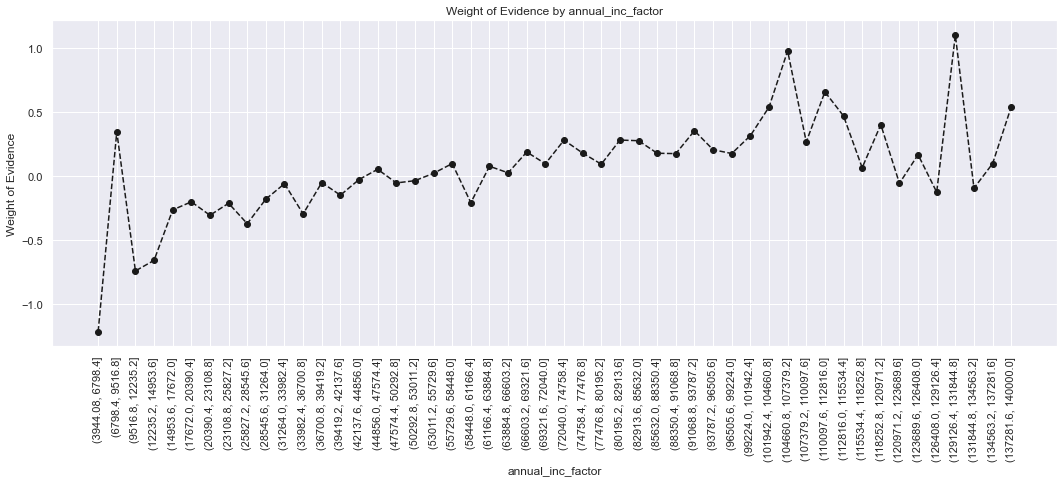

In [339]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

    We will split with a width of $10000, but first and last category will have low no. of values.So, let's make sure first and last 2 categories have a width of $20000. The intervals from $20k to $100k will have a width of $10k.

In [340]:
df_inputs_prepr['annual_inc : <20k'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc : 20k-30k'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc : 30k-40k'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc : 40k-50k'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc : 50k-60k'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc : 60k-70k'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc : 70k-80k'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc : 80k-90k'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc : 90k-100k'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc : 100k-120k'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc : 120k-140k'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc : >140k'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

## mths_since_last_delinq variable

In [341]:
df_inputs_prepr['mths_since_last_delinq'].isnull().sum()

20493

There are a lot of missing values in this variable. So, we will create a dummy variable which is 1: when value is missing, 0: value isn't missing


In [342]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]

In [343]:
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2368/3780888314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.12, 2.4]    463   0.844492    0.041046   391.0   72.0   
1                     (2.4, 4.8]    242   0.851240    0.021454   206.0   36.0   
2                     (4.8, 7.2]    411   0.815085    0.036436   335.0   76.0   
3                     (7.2, 9.6]    284   0.855634    0.025177   243.0   41.0   
4                    (9.6, 12.0]    469   0.842217    0.041578   395.0   74.0   
5                   (12.0, 14.4]    304   0.802632    0.026950   244.0   60.0   
6                   (14.4, 16.8]    384   0.812500    0.034043   312.0   72.0   
7                   (16.8, 19.2]    541   0.839187    0.047961   454.0   87.0   
8                   (19.2, 21.6]    351   0.868946    0.031117   305.0   46.0   
9                   (21.6, 24.0]    575   0.857391    0.050975   493.0   82.0   
10                  (24.0, 26.4]    351   0.863248    0.031117   303.0   48.0   
11                  (26.4, 28.8]    325   0.858462    0.028812   279.0   46.0   
12                  (28.8, 31.2]    541   0.872458    0.047961   472.0   69.0   
13                  (31.2, 33.6]    326   0.883436    0.028901   288.0   38.0   
14                  (33.6, 36.0]    529   0.892250    0.046897   472.0   57.0   
15                  (36.0, 38.4]    380   0.865789    0.033688   329.0   51.0   
16                  (38.4, 40.8]    350   0.834286    0.031028   292.0   58.0   
17                  (40.8, 43.2]    470   0.851064    0.041667   400.0   70.0   
18                  (43.2, 45.6]    342   0.845029    0.030319   289.0   53.0   
19                  (45.6, 48.0]    469   0.833689    0.041578   391.0   78.0   
20                  (48.0, 50.4]    230   0.830435    0.020390   191.0   39.0   
21                  (50.4, 52.8]    197   0.817259    0.017465   161.0   36.0   
22                  (52.8, 55.2]    305   0.842623    0.027039   257.0   48.0   
23                  (55.2, 57.6]    217   0.815668    0.019238   177.0   40.0   
24                  (57.6, 60.0]    338   0.863905    0.029965   292.0   46.0   
25                  (60.0, 62.4]    161   0.850932    0.014273   137.0   24.0   
26                  (62.4, 64.8]    181   0.850829    0.016046   154.0   27.0   
27                  (64.8, 67.2]    251   0.812749    0.022252   204.0   47.0   
28                  (67.2, 69.6]    185   0.854054    0.016401   158.0   27.0   
29                  (69.6, 72.0]    294   0.833333    0.026064   245.0   49.0   
30                  (72.0, 74.4]    201   0.815920    0.017819   164.0   37.0   
31                  (74.4, 76.8]    182   0.829670    0.016135   151.0   31.0   
32                  (76.8, 79.2]    228   0.855263    0.020213   195.0   33.0   
33                  (79.2, 81.6]    148   0.790541    0.013121   117.0   31.0   
34                  (81.6, 84.0]     44   0.795455    0.003901    35.0    9.0   
35                  (84.0, 86.4]      2   1.000000    0.000177     2.0    0.0   
36                  (86.4, 88.8]      0        NaN    0.000000     NaN    NaN   
37                  (88.8, 91.2]      1   1.000000    0.000089     1.0    0.0   
38                  (91.2, 93.6]      0        NaN    0.000000     NaN    NaN   
39                  (93.6, 96.0]      2   1.000000    0.000177     2.0    0.0   
40                  (96.0, 98.4]      1   0.000000    0.000089     0.0    1.0   
41                 (98.4, 100.8]      0        NaN    0.000000     NaN    NaN   
42                (100.8, 103.2]      1   1.000000    0.000089     1.0    0.0   
43                (103.2, 105.6]      0        NaN    0.000000     NaN    NaN   
44                (105.6, 108.0]      2   0.500000    0.000177     1.0    1.0   
45                (108.0, 110.4]      0        NaN    0.000000     NaN    NaN   
46                (110.4, 112.8]      0        NaN    0.000000     NaN    NaN   
47                (112.8, 115.2]      1   1.000000    0.000089     1.0    0.0   
48                (115.2, 117.6]  

In [ ]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [344]:
df_inputs_prepr['mths_since_last_delinq : Missing'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(), 1, 0)
df_inputs_prepr['mths_since_last_delinq : 0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] < 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq : 4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] < 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq : 31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] < 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq : >=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

## DTI(debt-to-income) variable

In [345]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (-0.03, 0.599]    510   0.890196    0.016051   454.0   56.0   
1     (0.599, 1.198]    409   0.872861    0.012873   357.0   52.0   
2     (1.198, 1.797]    435   0.852874    0.013691   371.0   64.0   
3     (1.797, 2.396]    443   0.873589    0.013943   387.0   56.0   
4     (2.396, 2.995]    479   0.881002    0.015076   422.0   57.0   
5     (2.995, 3.594]    496   0.870968    0.015611   432.0   64.0   
6     (3.594, 4.193]    539   0.875696    0.016964   472.0   67.0   
7     (4.193, 4.792]    596   0.870805    0.018758   519.0   77.0   
8     (4.792, 5.391]    645   0.894574    0.020300   577.0   68.0   
9      (5.391, 5.99]    665   0.903759    0.020930   601.0   64.0   
10     (5.99, 6.589]    695   0.867626    0.021874   603.0   92.0   
11    (6.589, 7.188]    709   0.888575    0.022315   630.0   79.0   
12    (7.188, 7.787]    766   0.891645    0.024109   683.0   83.0   
13    (7.787, 8.386]    851   0.849589    0.026784   723.0  128.0   
14    (8.386, 8.985]    865   0.872832    0.027224   755.0  110.0   
15    (8.985, 9.584]    887   0.860203    0.027917   763.0  124.0   
16   (9.584, 10.183]    862   0.889791    0.027130   767.0   95.0   
17  (10.183, 10.782]    933   0.863880    0.029365   806.0  127.0   
18  (10.782, 11.381]    925   0.859459    0.029113   795.0  130.0   
19   (11.381, 11.98]    884   0.854072    0.027822   755.0  129.0   
20   (11.98, 12.579]    891   0.856341    0.028043   763.0  128.0   
21  (12.579, 13.178]    992   0.857863    0.031221   851.0  141.0   
22  (13.178, 13.777]    993   0.855992    0.031253   850.0  143.0   
23  (13.777, 14.376]    987   0.850051    0.031064   839.0  148.0   
24  (14.376, 14.975]    967   0.843847    0.030435   816.0  151.0   
25  (14.975, 15.574]    979   0.866190    0.030812   848.0  131.0   
26  (15.574, 16.173]    921   0.855592    0.028987   788.0  133.0   
27  (16.173, 16.772]    925   0.831351    0.029113   769.0  156.0   
28  (16.772, 17.371]    865   0.849711    0.027224   735.0  130.0   
29   (17.371, 17.97]    854   0.844262    0.026878   721.0  133.0   
30   (17.97, 18.569]    819   0.844933    0.025777   692.0  127.0   
31  (18.569, 19.168]    843   0.827995    0.026532   698.0  145.0   
32  (19.168, 19.767]    789   0.847909    0.024832   669.0  120.0   
33  (19.767, 20.366]    813   0.826568    0.025588   672.0  141.0   
34  (20.366, 20.965]    775   0.832258    0.024392   645.0  130.0   
35  (20.965, 21.564]    689   0.822932    0.021685   567.0  122.0   
36  (21.564, 22.163]    702   0.849003    0.022094   596.0  106.0   
37  (22.163, 22.762]    692   0.828035    0.021779   573.0  119.0   
38  (22.762, 23.361]    624   0.831731    0.019639   519.0  105.0   
39   (23.361, 23.96]    593   0.848229    0.018664   503.0   90.0   
40   (23.96, 24.559]    519   0.845857    0.016335   439.0   80.0   
41  (24.559, 25.158]    417   0.848921    0.013124   354.0   63.0   
42  (25.158, 25.757]     82   0.829268    0.002581    68.0   14.0   
43  (25.757, 26.356]     72   0.805556    0.002266    58.0   14.0   
44  (26.356, 26.955]     87   0.931034    0.002738    81.0    6.0   
45  (26.955, 27.554]     58   0.827586    0.001825    48.0   10.0   
46  (27.554, 28.153]     72   0.930556    0.002266    67.0    5.0   
47  (28.153, 28.752]     54   0.870370    0.001700    47.0    7.0   
48  (28.752, 29.351]     57   0.877193    0.001794    50.0    7.0   
49   (29.351, 29.95]     48   0.875000    0.001511    42.0    6.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE      IV  
0      0.016667    0.012354  0.299443             NaN       NaN  0.0292  
1      0.013106    0.011471  0.133190        0.017335  0.166253  0.0292  
2      0.013620    0.014119 -0.035984        0.019987  0.169173  0.0292  
3      0.014207    0.012354  0.139770        0.020716  0.175754  0.0292  
4      0.015492    0.012574  0.208652        0.007413  0.068881  0.0292  
5      0.015859    0.014119  0.116240        0

In [ ]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [346]:
df_inputs_prepr['dti : <=1.6'] = np.where(df_inputs_prepr['dti'] <= 1.7, 1, 0)
df_inputs_prepr['dti : 1.7-4.1'] = np.where((df_inputs_prepr['dti'] > 1.7) & (df_inputs_prepr['dti'] <= 4.1), 1, 0)
df_inputs_prepr['dti : 4.1-8.9'] = np.where((df_inputs_prepr['dti'] > 4.1) & (df_inputs_prepr['dti'] <= 8.9), 1, 0)
df_inputs_prepr['dti : 8.9-14.4'] = np.where((df_inputs_prepr['dti'] > 8.9) & (df_inputs_prepr['dti'] <= 14.4), 1, 0)
df_inputs_prepr['dti : 14.4-16.8'] = np.where((df_inputs_prepr['dti'] > 14.4) & (df_inputs_prepr['dti'] <= 16.8), 1, 0)
df_inputs_prepr['dti : 16.8-24'] = np.where((df_inputs_prepr['dti'] > 16.8) & (df_inputs_prepr['dti'] <= 24.0), 1, 0)
df_inputs_prepr['dti : 24-35.9'] = np.where((df_inputs_prepr['dti'] > 24.0) & (df_inputs_prepr['dti'] <= 35.9), 1, 0)
df_inputs_prepr['dti : >35.9'] = np.where(df_inputs_prepr['dti'] > 35.9, 1, 0) 

In [347]:
df_inputs_prepr.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

## mths_since_last_record variable

In [348]:
df_inputs_prepr['mths_since_last_record'].isnull().sum()

29535

In [349]:
#Taking only non-null values
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

In [350]:
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2368/3524804430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    537   0.836127    0.239946   449.0   88.0   
1                   (2.58, 5.16]      0        NaN    0.000000     NaN    NaN   
2                   (5.16, 7.74]      2   0.500000    0.000894     1.0    1.0   
3                  (7.74, 10.32]      0        NaN    0.000000     NaN    NaN   
4                  (10.32, 12.9]      2   1.000000    0.000894     2.0    0.0   
5                  (12.9, 15.48]      2   1.000000    0.000894     2.0    0.0   
6                 (15.48, 18.06]      3   0.666667    0.001340     2.0    1.0   
7                 (18.06, 20.64]      2   0.500000    0.000894     1.0    1.0   
8                 (20.64, 23.22]     18   0.833333    0.008043    15.0    3.0   
9                  (23.22, 25.8]      3   1.000000    0.001340     3.0    0.0   
10                 (25.8, 28.38]     10   1.000000    0.004468    10.0    0.0   
11                (28.38, 30.96]      9   0.666667    0.004021     6.0    3.0   
12                (30.96, 33.54]      9   0.777778    0.004021     7.0    2.0   
13                (33.54, 36.12]     11   1.000000    0.004915    11.0    0.0   
14                 (36.12, 38.7]      8   0.875000    0.003575     7.0    1.0   
15                 (38.7, 41.28]     10   0.900000    0.004468     9.0    1.0   
16                (41.28, 43.86]     12   0.833333    0.005362    10.0    2.0   
17                (43.86, 46.44]     12   0.833333    0.005362    10.0    2.0   
18                (46.44, 49.02]     13   0.615385    0.005809     8.0    5.0   
19                 (49.02, 51.6]      8   0.875000    0.003575     7.0    1.0   
20                 (51.6, 54.18]     11   0.909091    0.004915    10.0    1.0   
21                (54.18, 56.76]     14   0.857143    0.006256    12.0    2.0   
22                (56.76, 59.34]     22   0.818182    0.009830    18.0    4.0   
23                (59.34, 61.92]     17   0.764706    0.007596    13.0    4.0   
24                 (61.92, 64.5]     25   0.760000    0.011171    19.0    6.0   
25                 (64.5, 67.08]     17   0.823529    0.007596    14.0    3.0   
26                (67.08, 69.66]     15   0.866667    0.006702    13.0    2.0   
27                (69.66, 72.24]     17   0.764706    0.007596    13.0    4.0   
28                (72.24, 74.82]     13   0.461538    0.005809     6.0    7.0   
29                 (74.82, 77.4]     25   0.640000    0.011171    16.0    9.0   
30                 (77.4, 79.98]     10   0.600000    0.004468     6.0    4.0   
31                (79.98, 82.56]     24   0.708333    0.010724    17.0    7.0   
32                (82.56, 85.14]     38   0.842105    0.016979    32.0    6.0   
33                (85.14, 87.72]     91   0.769231    0.040661    70.0   21.0   
34                 (87.72, 90.3]    137   0.773723    0.061215   106.0   31.0   
35                 (90.3, 92.88]     74   0.783784    0.033065    58.0   16.0   
36                (92.88, 95.46]    118   0.754237    0.052726    89.0   29.0   
37                (95.46, 98.04]    112   0.767857    0.050045    86.0   26.0   
38               (98.04, 100.62]     81   0.802469    0.036193    65.0   16.0   
39               (100.62, 103.2]    112   0.785714    0.050045    88.0   24.0   
40               (103.2, 105.78]     82   0.792683    0.036640    65.0   17.0   
41              (105.78, 108.36]    126   0.801587    0.056300   101.0   25.0   
42              (108.36, 110.94]     82   0.792683    0.036640    65.0   17.0   
43              (110.94, 113.52]    125   0.728000    0.055853    91.0   34.0   
44               (113.52, 116.1]    101   0.772277    0.045130    78.0   23.0   
45               (116.1, 118.68]     69   0.797101    0.030831    55.0   14.0   
46              (118.68, 121.26]      8   0.875000    0.003575     7.0    1.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

In [ ]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [351]:
df_inputs_prepr['mths_since_last_record : Missing'] = np.where(df_inputs_prepr['mths_since_last_record'].isnull(), 1, 0)
df_inputs_prepr['mths_since_last_record : 0-2'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(0,3)), 1, 0)
df_inputs_prepr['mths_since_last_record : 3-20'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(3,21)), 1, 0)
df_inputs_prepr['mths_since_last_record : 21-40'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(21,41)), 1, 0)
df_inputs_prepr['mths_since_last_record : 41-65'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(41,66)), 1, 0)
df_inputs_prepr['mths_since_last_record : 66-84'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(66,85)), 1, 0)
df_inputs_prepr['mths_since_last_record : 85-96'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(85,97)), 1, 0)
df_inputs_prepr['mths_since_last_record : >=97'] = np.where(df_inputs_prepr['mths_since_last_record'].isin(range(97,int(df_inputs_prepr['mths_since_last_record'].max()))), 1, 0)

# Preprocessing test dataset

In [ ]:
#loan_data_inputs_train = df_inputs_prepr

        After executing the code from reassigning test_input and test_target to df_inputs_prep and df_targets_prep, now df_inputs_prep contains data for test dataset. Let's reassign this to loan_data_inputs_test

In [ ]:
#loan_data_inputs_test = df_inputs_prepr

In [ ]:
# #Exporting the final datasets to CSV files
# loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
# loan_data_targets_train.to_csv('loan_data_targets_train.csv')
# loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
# loan_data_targets_test.to_csv('loan_data_targets_test.csv')

Linear regression: output = linear combination of predictors
Logistic regression: P(Y = 1) = $\frac{\exp (linear combi)}{1 + \exp(linear combi)}$

$\frac{P(Y=1)}{P(Y=0)}$ [This ratio is called odds] = $\exp(linear combi)$

Taking ln on both sides: ln($\frac{P(Y=1)}{P(Y=0)}$) = linear combi. So, linear and logistic regression are equivalent.

ln($\frac{P(Y=1 | X1= 1)}{P(Y=0 | X1 = 1)}$) - ln($\frac{P(Y=1 | X1= 0)}{P(Y=0 | X1 = 0)}$ = Beta1

Which implies,
ln($\frac{odds(Y = 1 | X1 = 1)}{odds(Y = 1 | X1 = 0)}$) = Beta1

Also, $\frac{odds(Y = 1 | X1 = 1)}{odds(Y = 1 | X1 = 0)}$ = $\exp(Beta1)$